<a href="https://colab.research.google.com/github/NISHANK9/Seoul-bike-prediction/blob/main/Seoul_bike_prediction_capstone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title : Seoul Bike Sharing Demand Prediction**

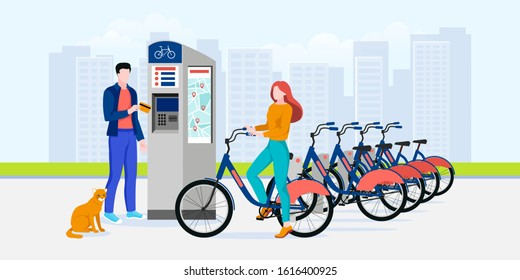


**Problem Description**

*Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.*

**Data Description**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


In [560]:
##Importing the requried libraries and modules 

import pandas as pd  # For data cleaning and analysis
from scipy import stats # Python libray for solving scientific and mathamatical problem
import seaborn as sns  # Python libray for data visualization and exploratory data analysis.
import numpy as np # Python libray use for working with arrays
import matplotlib.pyplot as plt # Matplotlib module use to effectively makes matplotlib a viable open source alternative to MATLAB

In [368]:
## Mounting drive to acess file

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [369]:
df=pd.read_csv('/content/drive/MyDrive/Alma better/SeoulBikeData.csv',encoding='unicode_escape')
df.head(2)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes

##Data Exploration And Data Cleaning##

In [370]:
## Checking total rows and columns in the dataset

print("Shape of Dataframe is :" ,df.shape , "\n", "Total number of rows in dataset : ",df.shape [0], "\n","Total number of columns in data")

Shape of Dataframe is : (8760, 14) 
 Total number of rows in dataset :  8760 
 Total number of columns in data


In [371]:
## Checking the info of dataframe and knowing data types of columns.

df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [372]:
#checking the description of dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [561]:
#Since the variables having units with name, renaming columns for better variable analysis.
df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [374]:
# checking duplicates of datatset
print( 'There are' ,df.duplicated().sum() ,' duplicates in the dataset')

There are 0  duplicates in the dataset


In [375]:
#checking null values in the dataset 
print('There are', df.isnull().sum(),'null values in the dataset')

There are Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64 null values in the dataset


In [376]:
###  For further analysis of bike rentals with months,year and day. Changeing the datatype of Date column to extract 'Month' ,'Day', "Year".
df['Date']=df['Date'].astype('datetime64[ns]')
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day_name()

In [377]:
#drpping Date column
df.drop(columns=['Date'],inplace=True)

## Now we will head to data anlysis of dataset##

In [378]:
## Checking different catagories counts for Seasons categories.

df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [379]:
## Checking different catagories counts for Holiday categories.

df['Holiday'].value_counts()


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [380]:
## Checking different catagories counts for Functioning_Day categories.

df['Functioning_Day'].value_counts()
     

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [381]:
## Checking different categories counts for for Month categories
df['month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

In [382]:
df['weekdays_or_weekends']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)

In [383]:
## Checking different categories counts for for Weekdays_or_weekend categories
df['weekdays_or_weekends'].value_counts()
     

0    6216
1    2544
Name: weekdays_or_weekends, dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

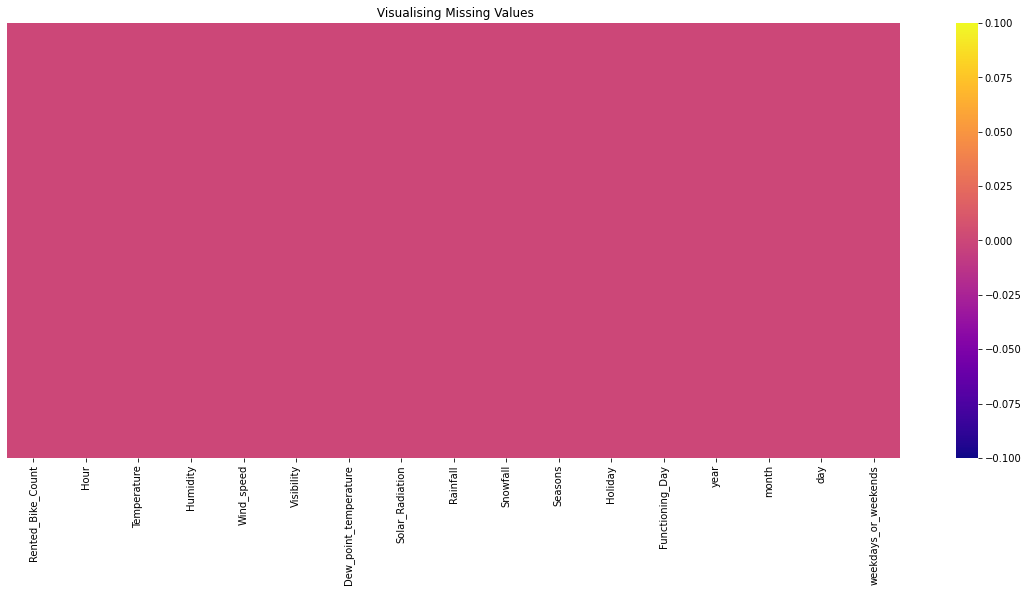

In [384]:
## Visulaizing null or missing values using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

There are no null values

In [385]:
# we will drop this because we know dataset has data of last one year 
df.drop(columns=['year'],inplace=True)

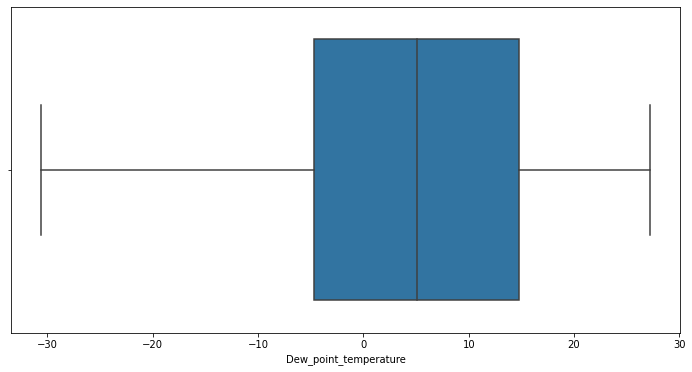

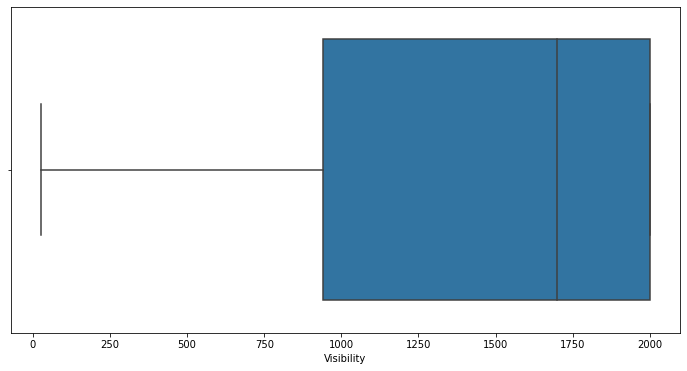

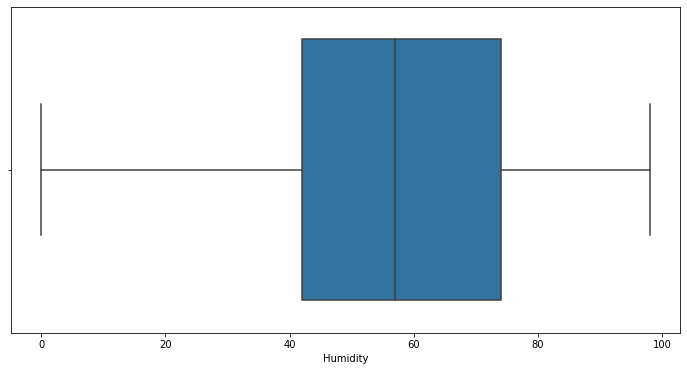

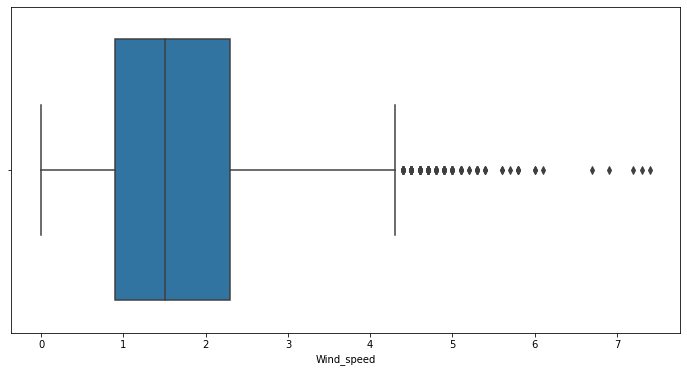

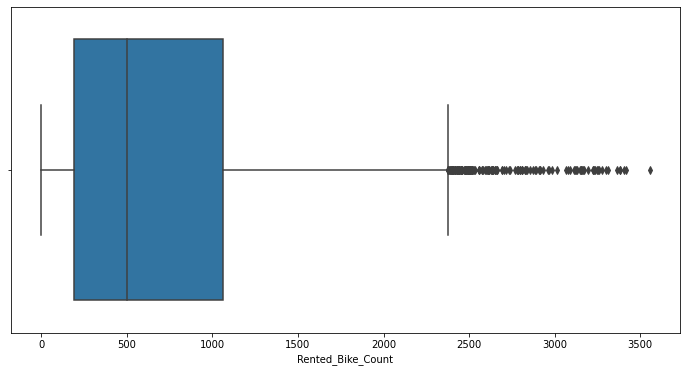

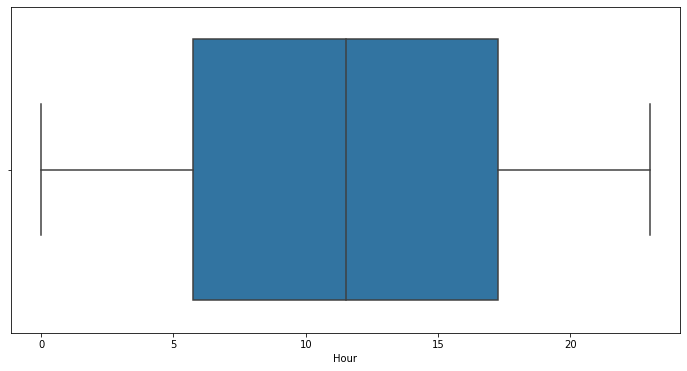

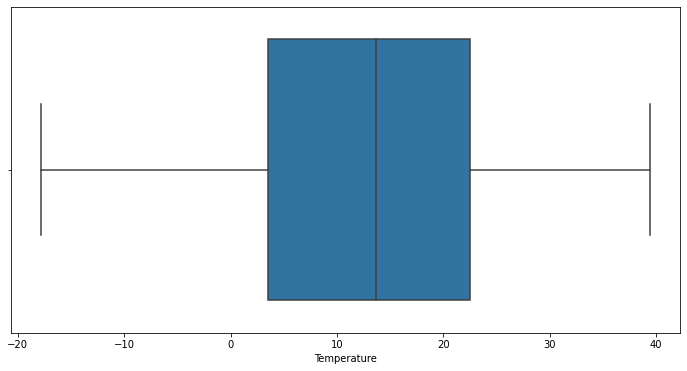

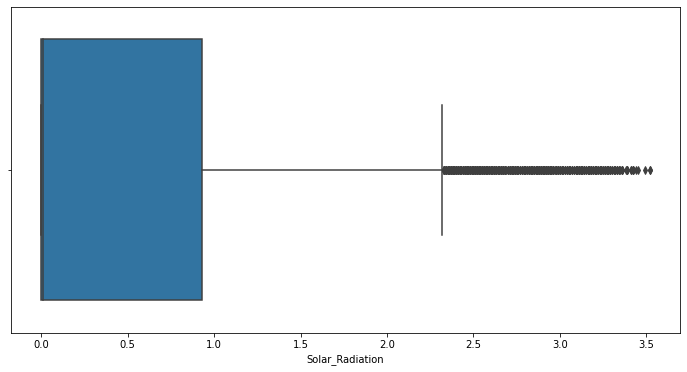

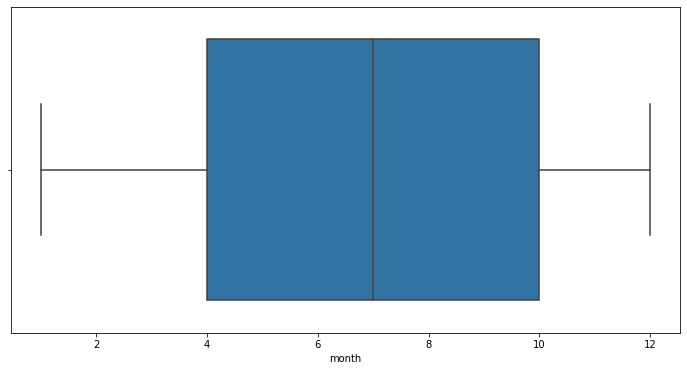

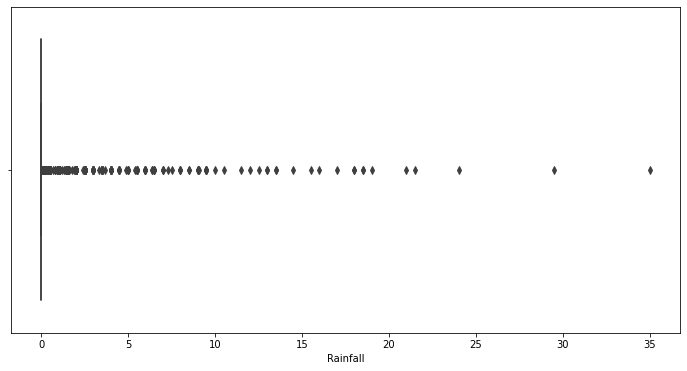

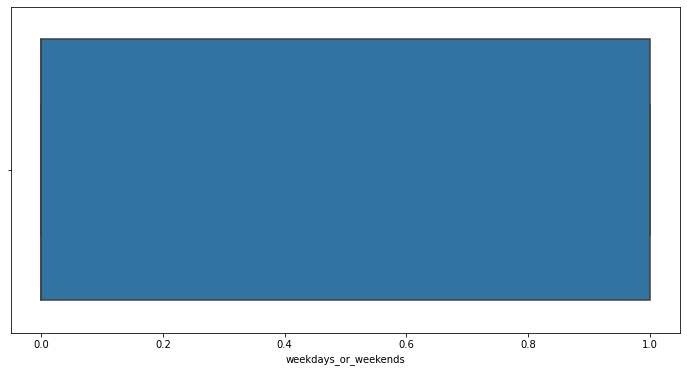

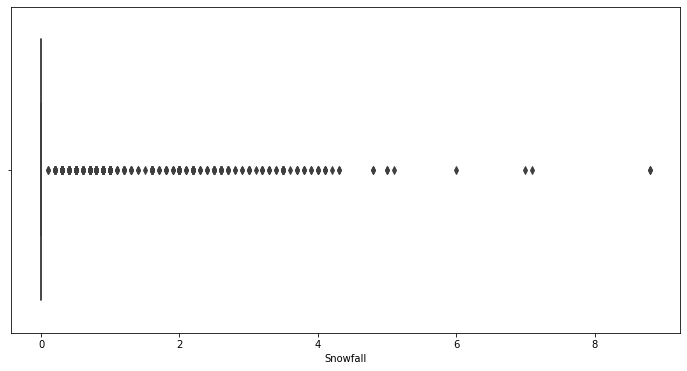

In [386]:
# Creating numeric columns list.
num_col=list(set(df.describe().columns))
num_col

# Creating categorical columns list.
cat_col=list(set(df.columns)-set(df.describe().columns))


## Priting box plot of numeric columns to check oultliers
for i in num_col:
    fig=plt.figure(figsize=(12,6))
    ax=fig.gca()
    sns.boxplot(x=df[i])

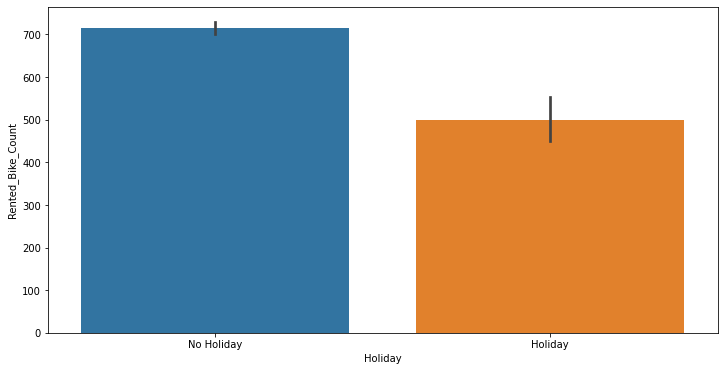

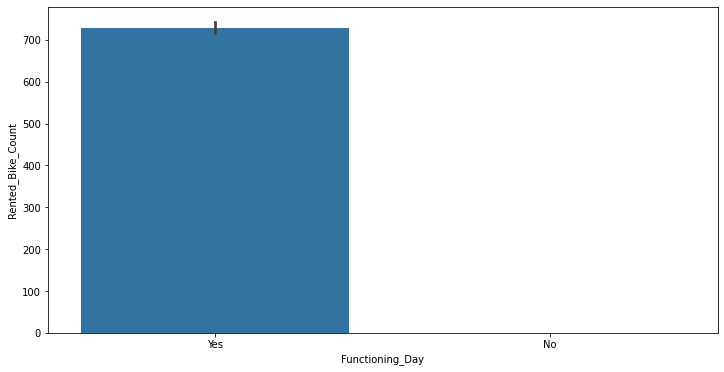

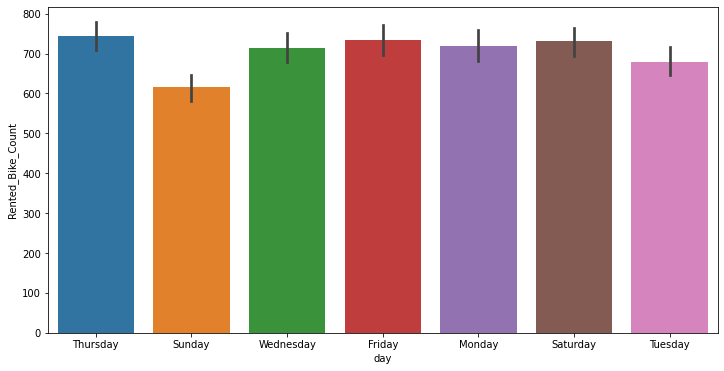

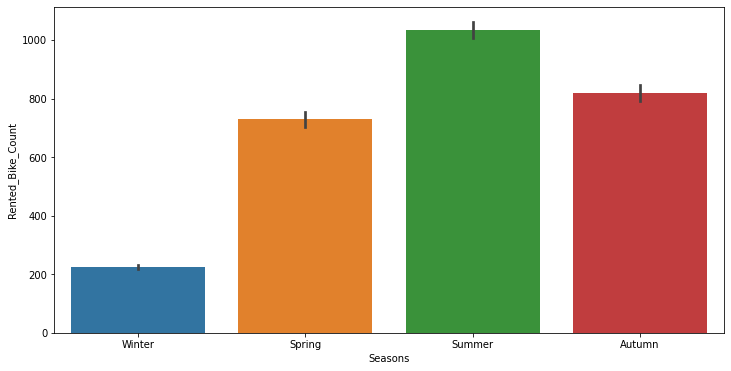

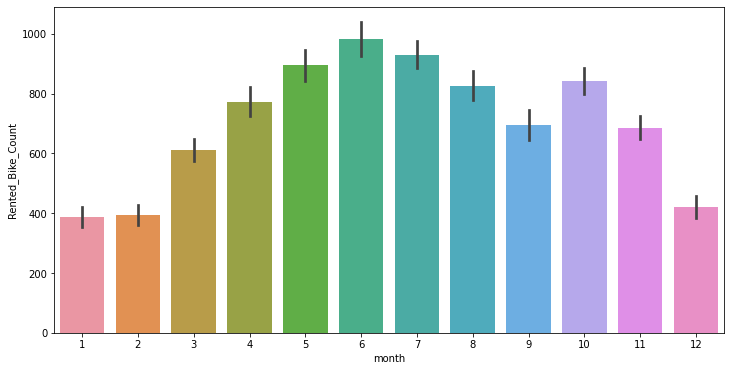

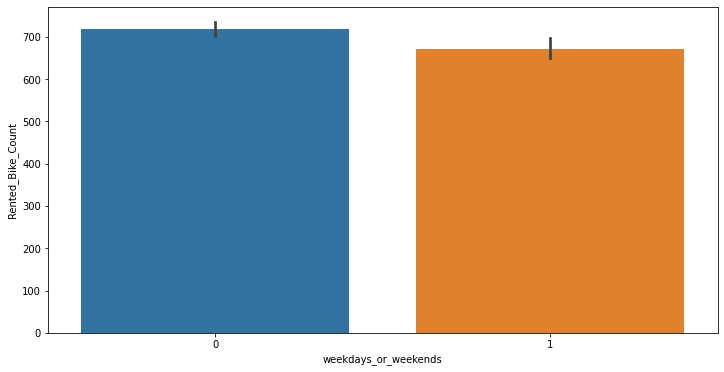

In [387]:
# Adding two  more categorical columns 
cat_col.extend(['month','weekdays_or_weekends'])

## Creating barchart for each categorical columns with respect to target(dependent variable) variable to insights.
for i in cat_col:
    fig=plt.figure(figsize=(12,6))
    ax=fig.gca()
    sns.barplot(x=df[i],y=df['Rented_Bike_Count'])

#observation
1) Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.

2) High number of bikes were rented on No Holidays.

3) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.

4) Most of the bikes were rented on Weekdays compared to weekends.

5) From March Bike Rent Count started increasing and it was highest in June.

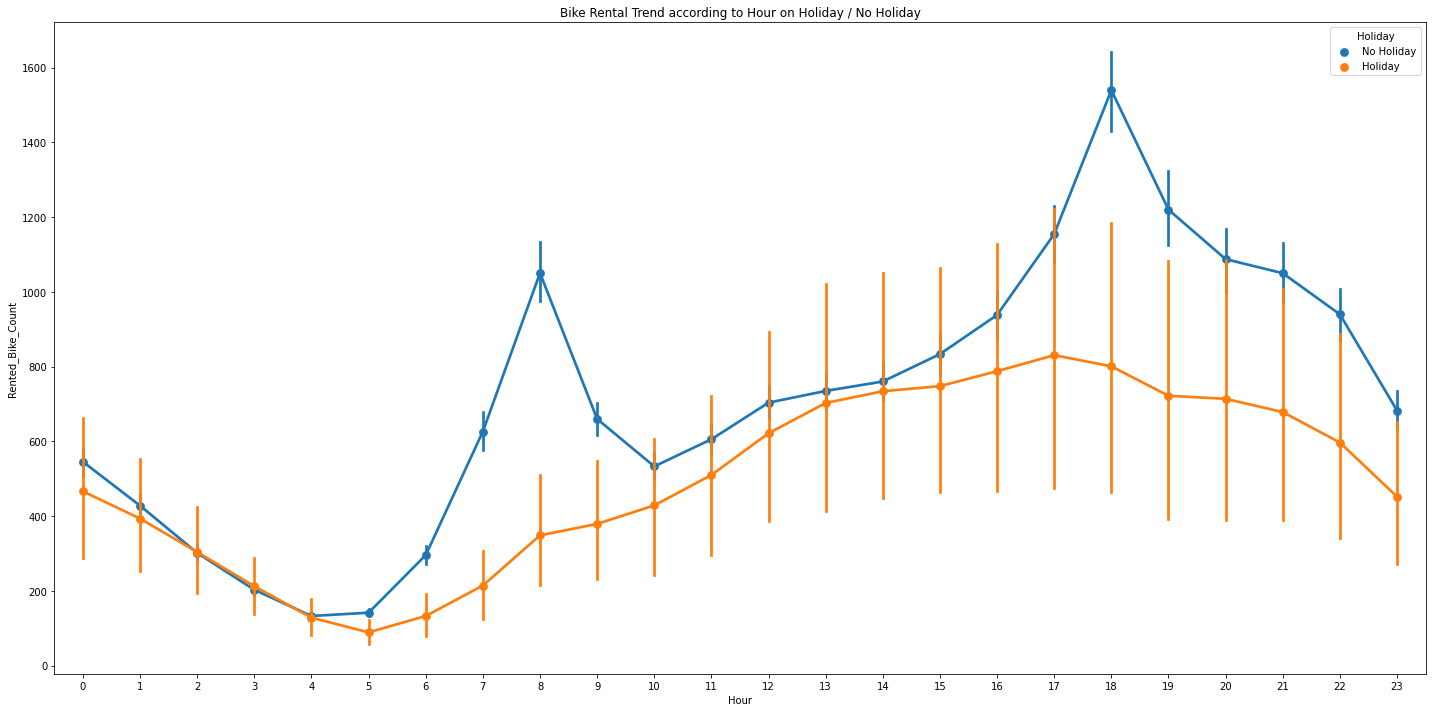

In [388]:
### Checking bike rent count trend with respect to Hour on Holidays columns 
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")
plt.tight_layout()

#Observation
Observation
1) There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different less bike rentals happend.

2) Again there is peak between 4/5 PM to 7 PM. may be its office leaving time for the above people.( NO Holiday).

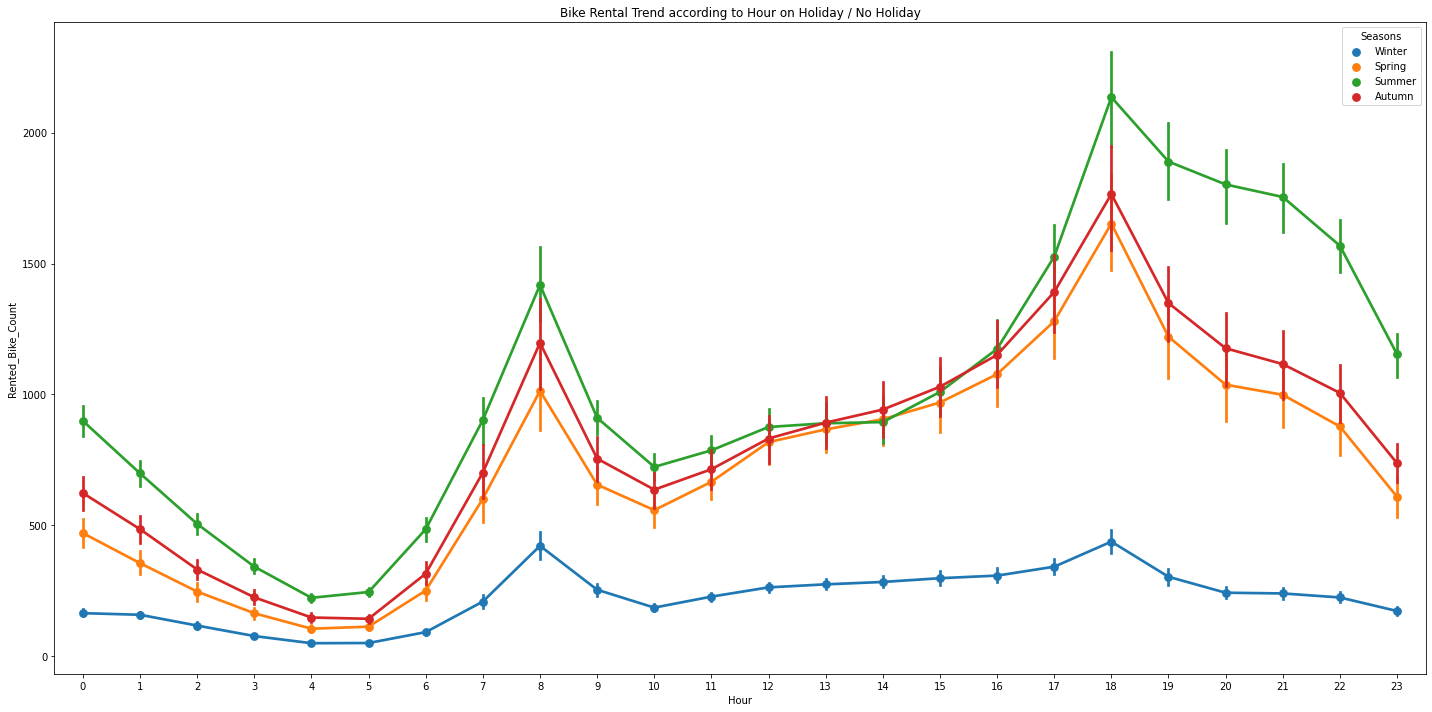

In [389]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Seasons'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")
plt.tight_layout()

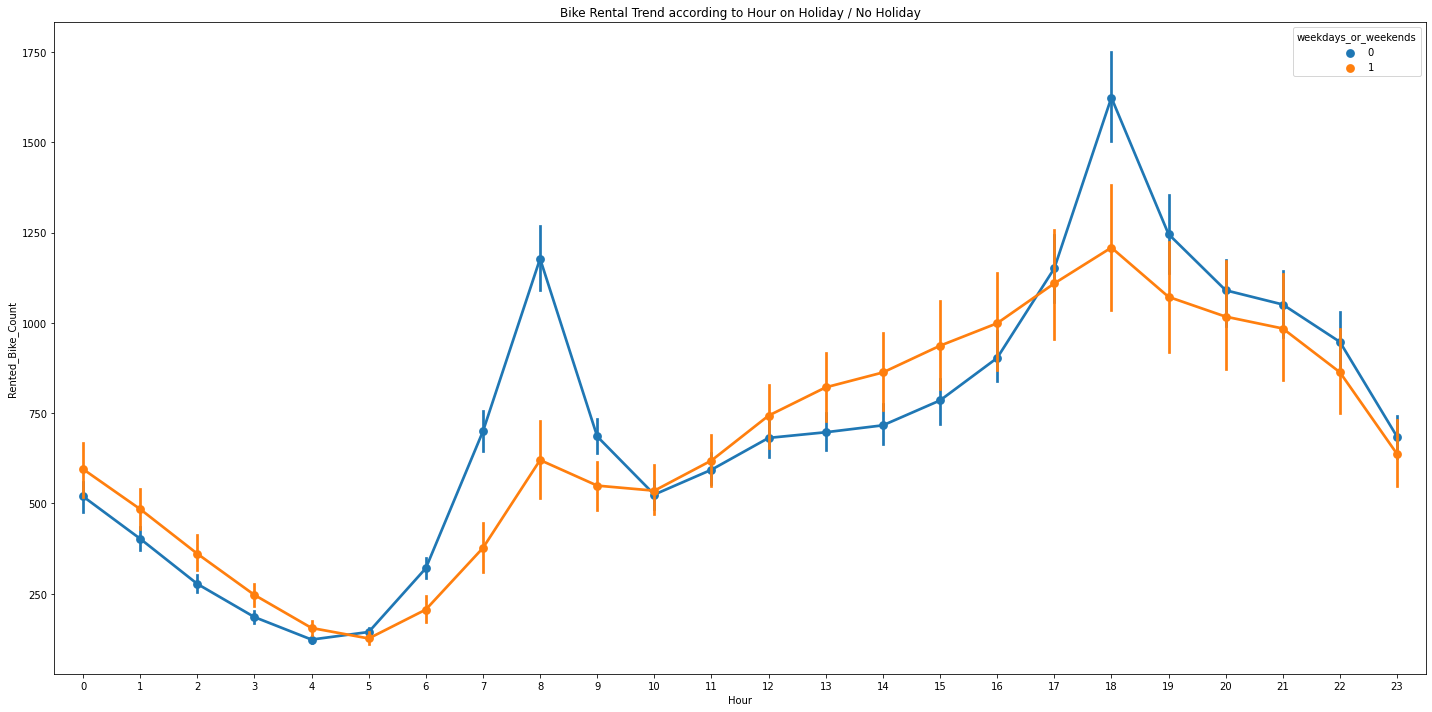

In [390]:
#Checking bike rent count trend with respect to Hour on weekends or weekdays columns
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['weekdays_or_weekends'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")
plt.tight_layout()

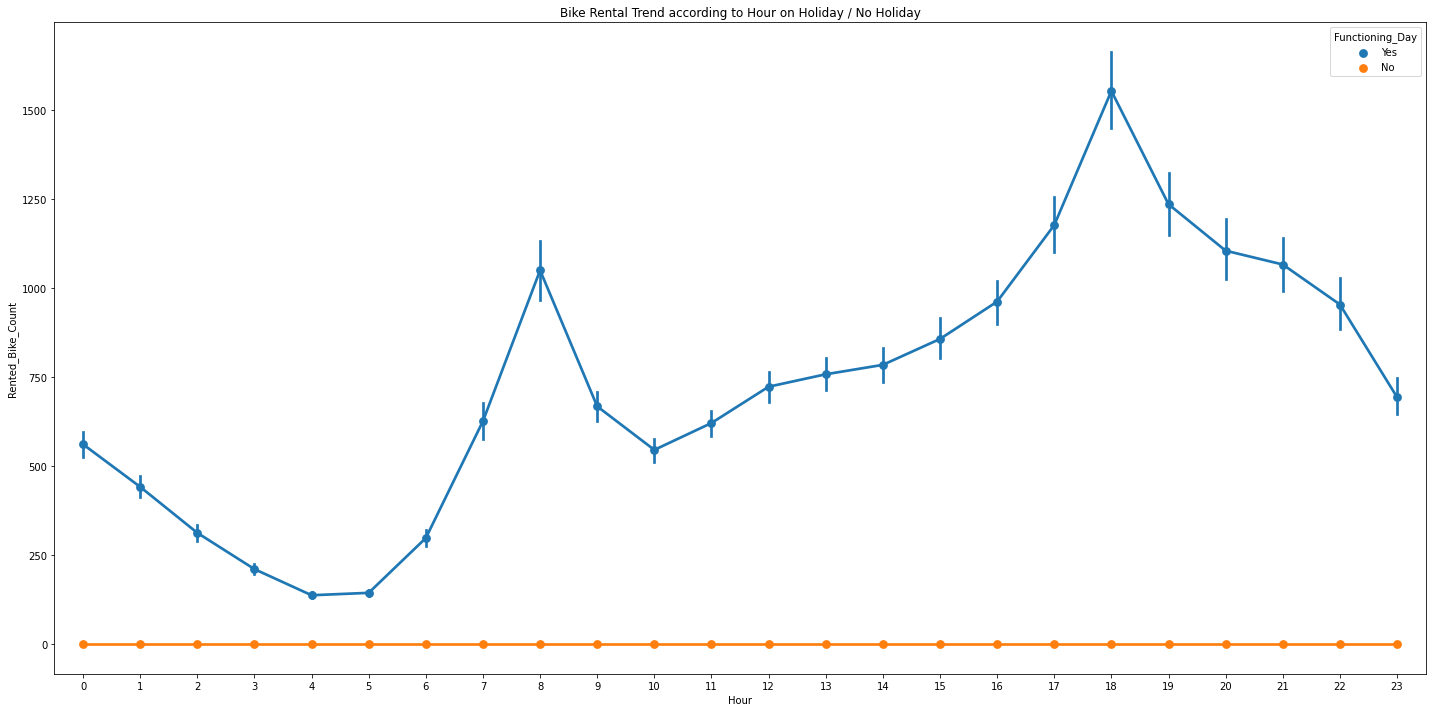

In [391]:
# Checking bike rent count trend with respect to Hour on Holidays columns
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")
plt.tight_layout()

#Observation
1) Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there is no bike rentals.

(if we drop no fucntioning day rows. we will left only with the functioning day values.thus the column having same value through out will not be helpful.

So,its better to drop the column.)

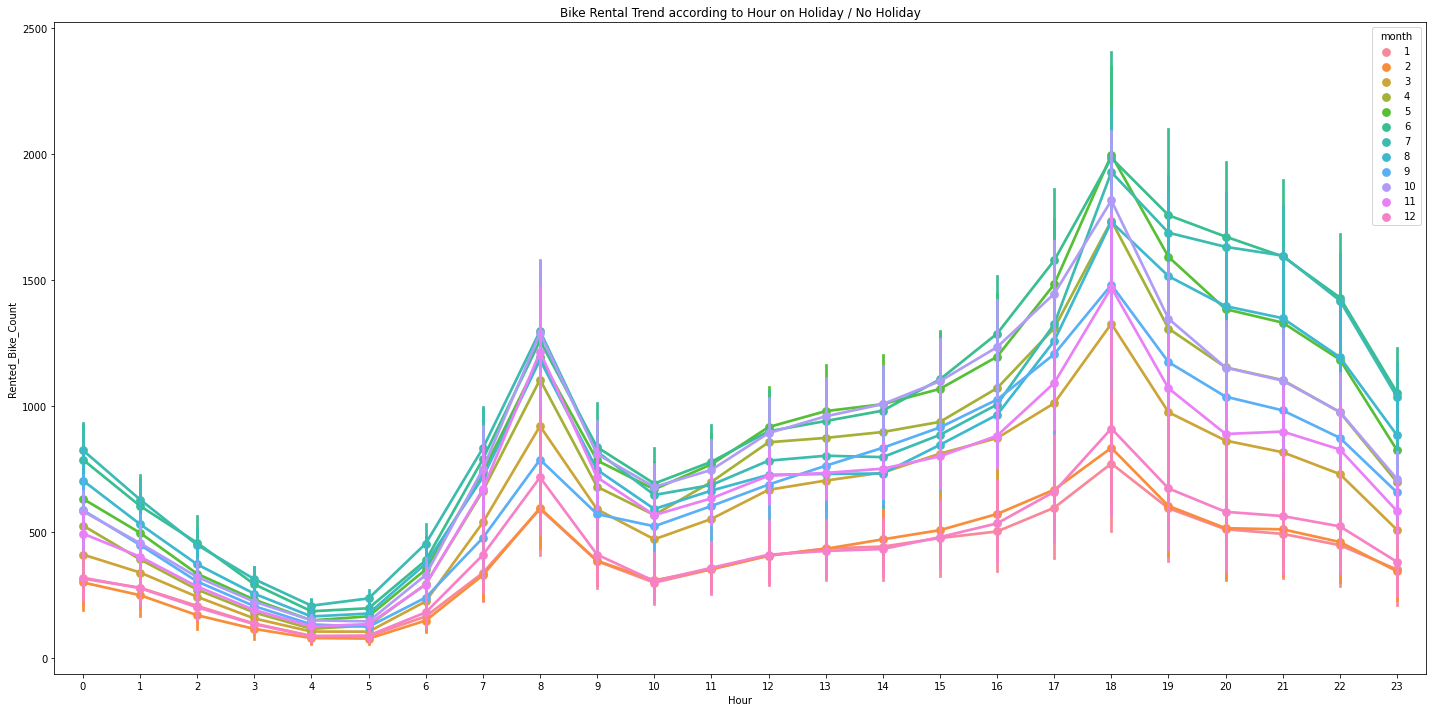

In [392]:
## Checking bike rent count trend with respect to Hour on months columns
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['month'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")
plt.tight_layout()

##Checking Distribution of target(dependent) variable: "Bike Rented Count"##

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


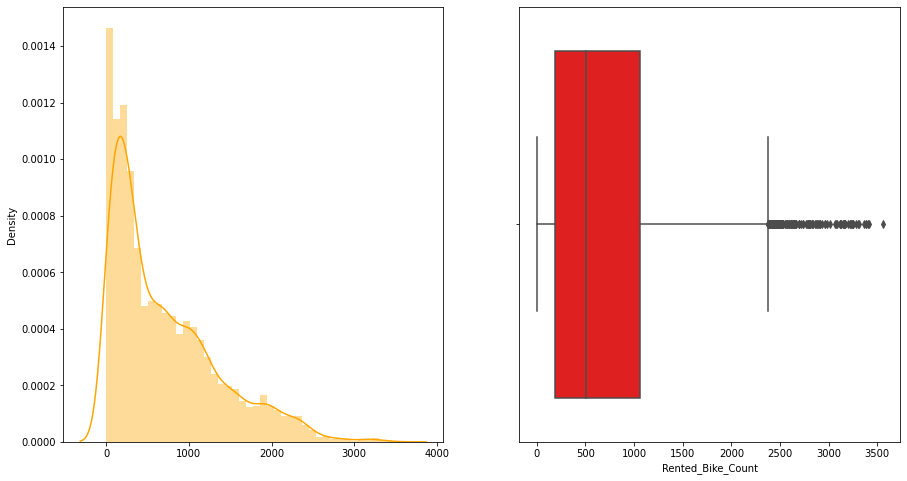

In [393]:
# plotting subplots
fig,axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df['Rented_Bike_Count'],color='orange',ax=axes[0])
#plt.figure(figsize=(15,8))
sns.boxplot(x=df['Rented_Bike_Count'],color='red',ax=axes[1])

There is right skewed data distribution in target columns and there are outliers are also present . So we will change them by applyting sqrt transformations.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


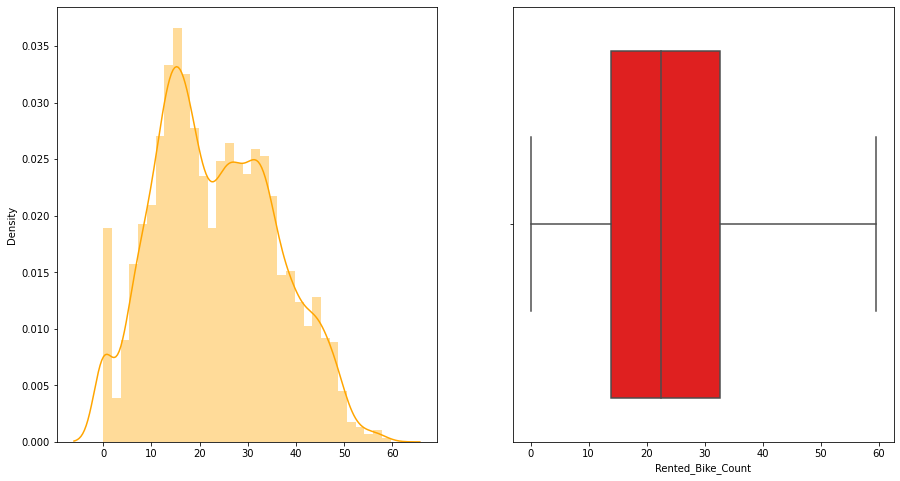

In [394]:
fig,axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented_Bike_Count']),color='orange',ax=axes[0])
#plt.figure(figsize=(15,8))
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']),color='red',ax=axes[1])

As we can see by applying sqrt we have changed the distribution to normal distribution and it has remoed outliers also 

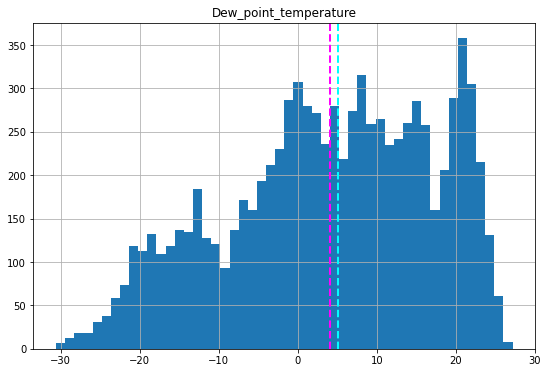

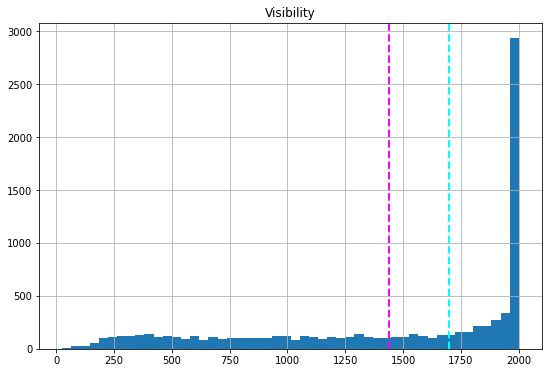

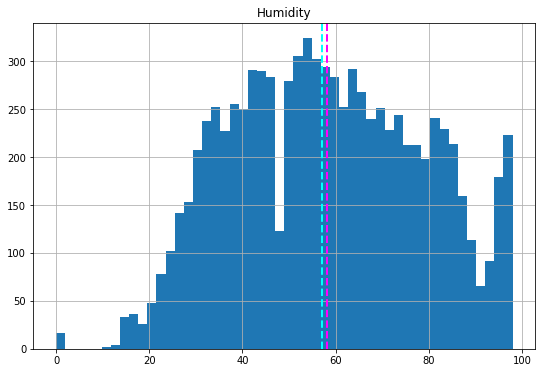

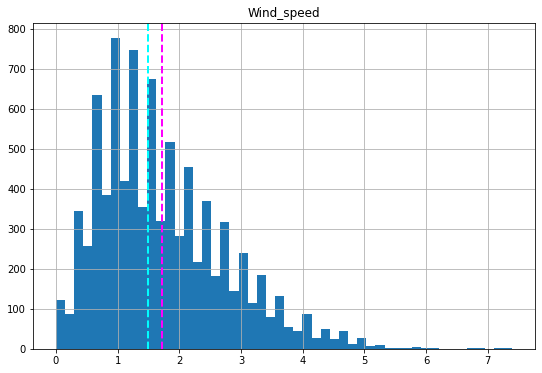

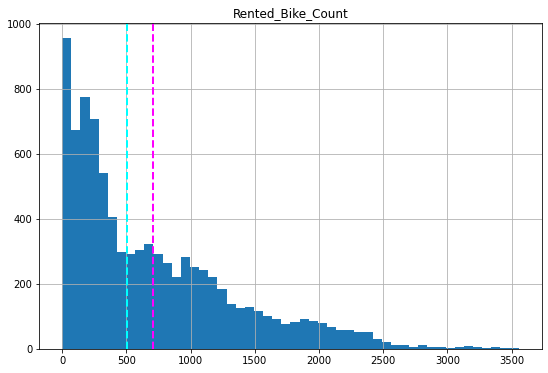

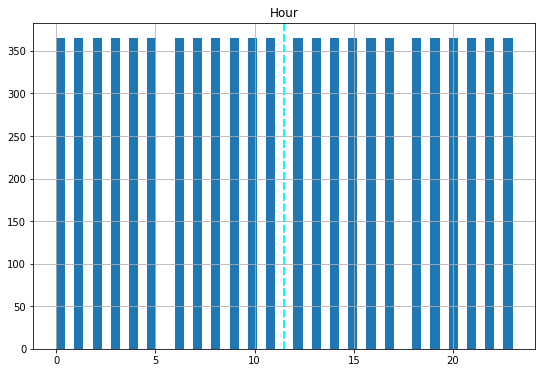

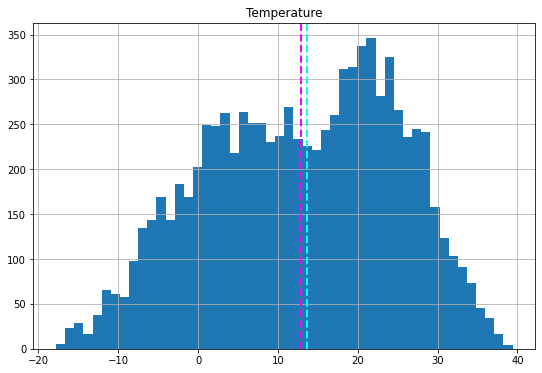

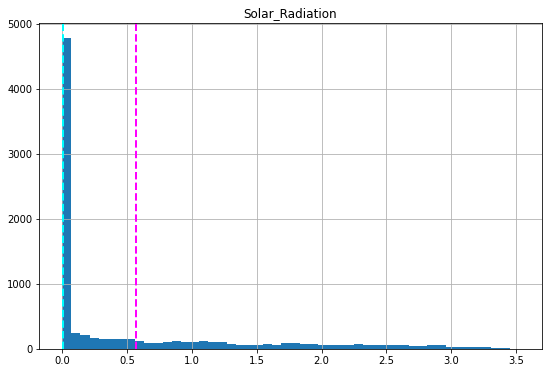

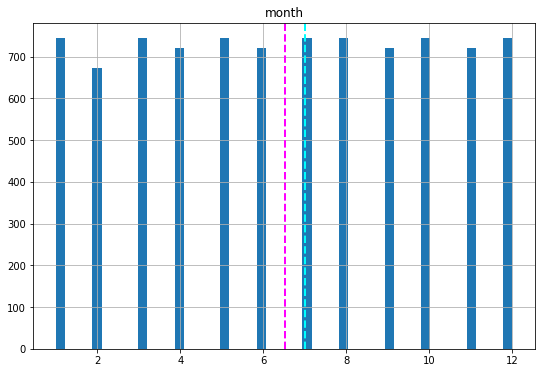

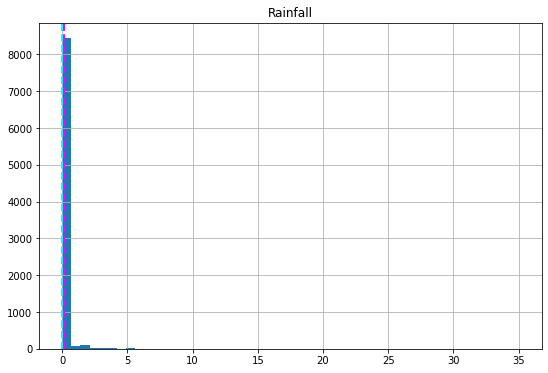

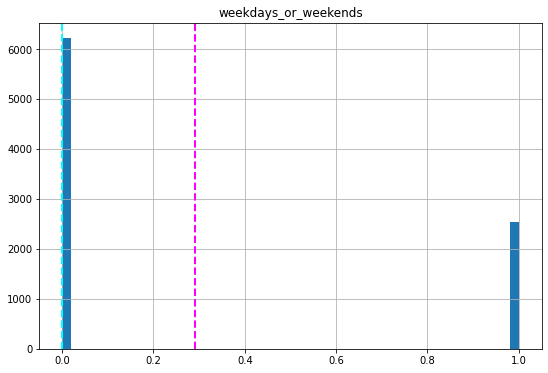

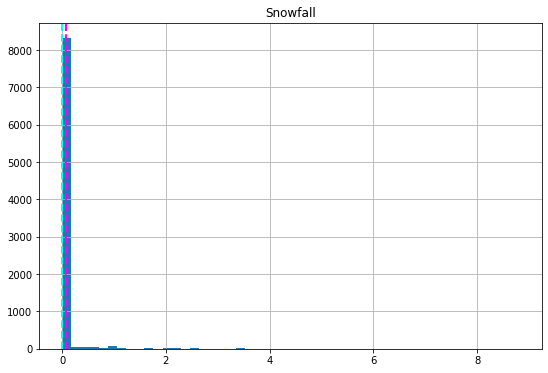

In [395]:
# Plot  a histogram graph to check where mean and medians are lying in the distribution and the data points in variables are distributed.

for col in num_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#Lets check the relationship between the dependent variable-"Rented Bike Count'and remaining columns(independent variable)#

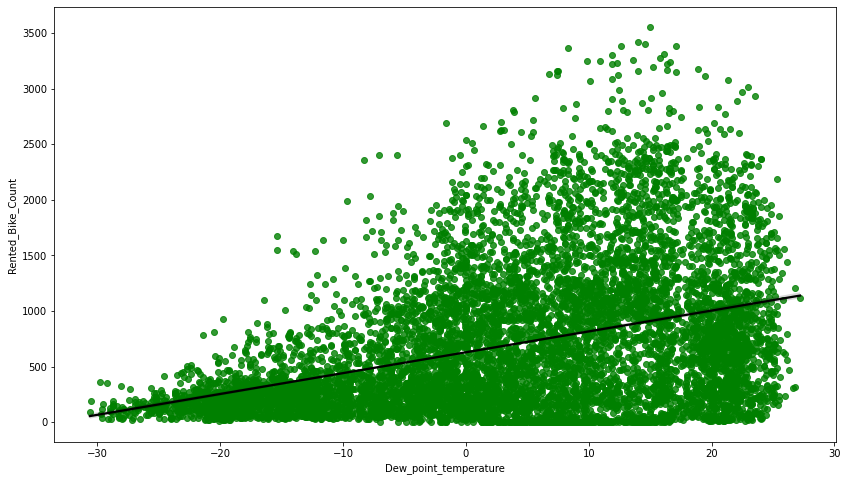

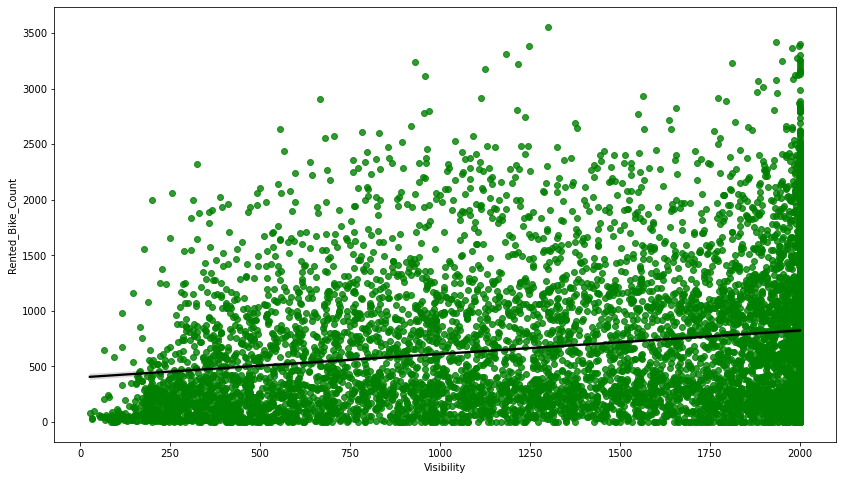

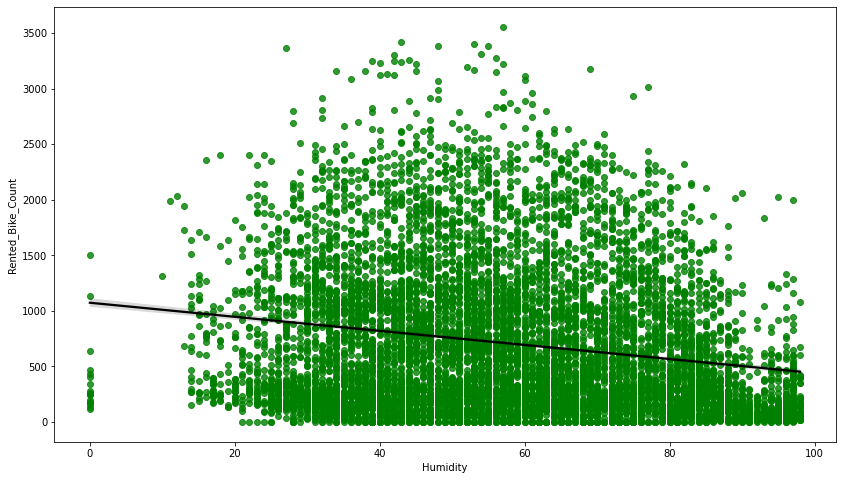

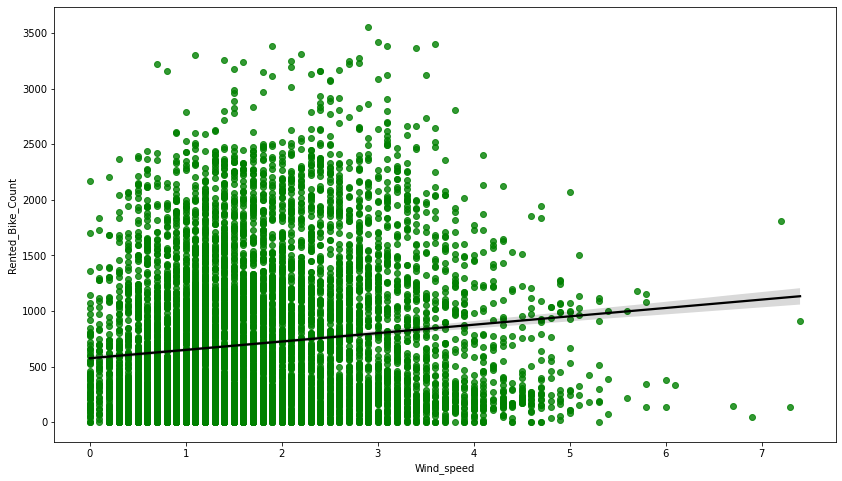

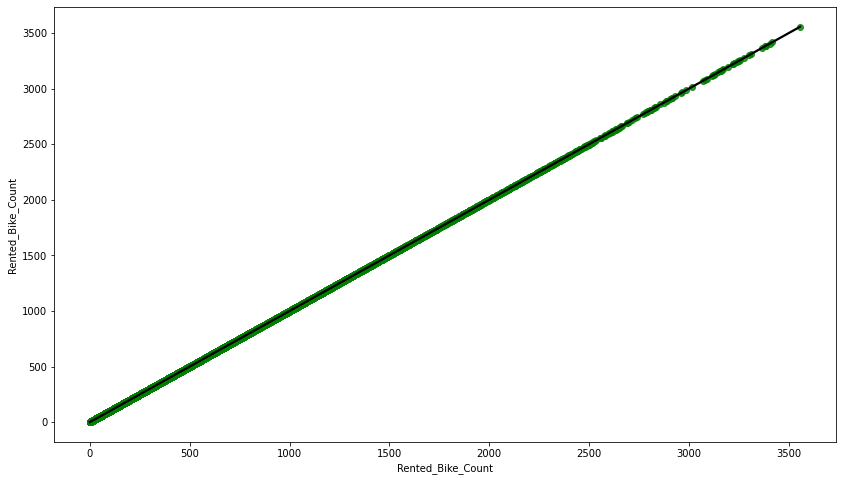

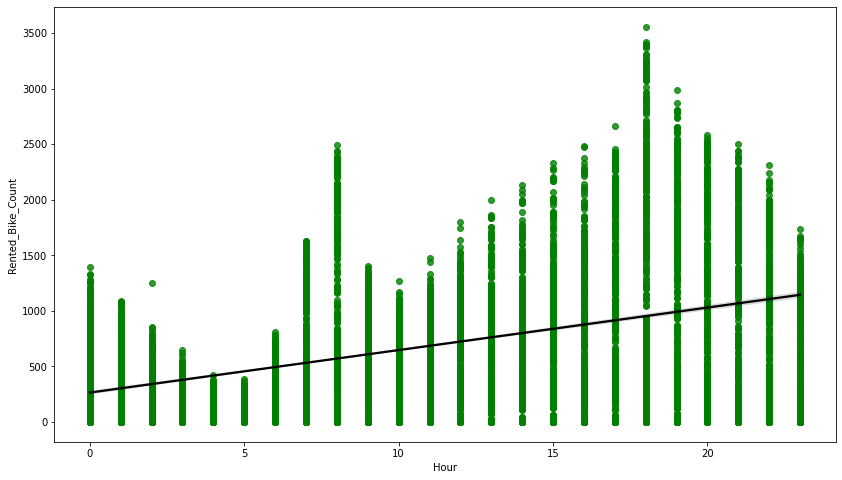

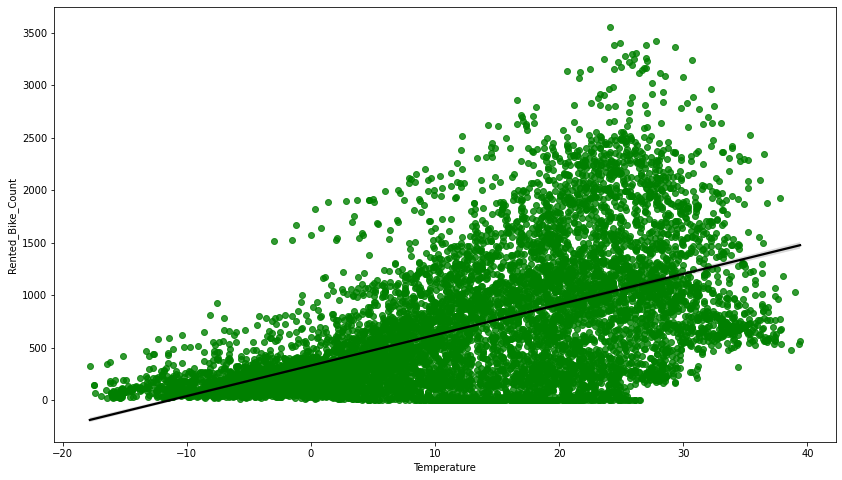

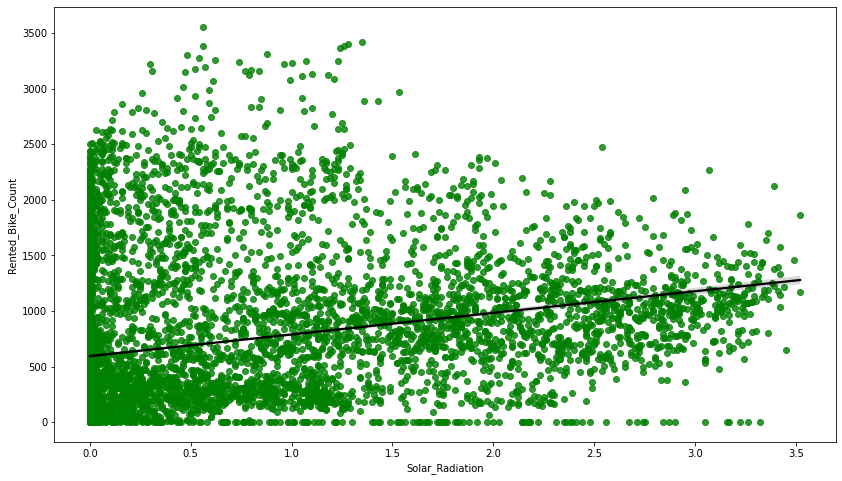

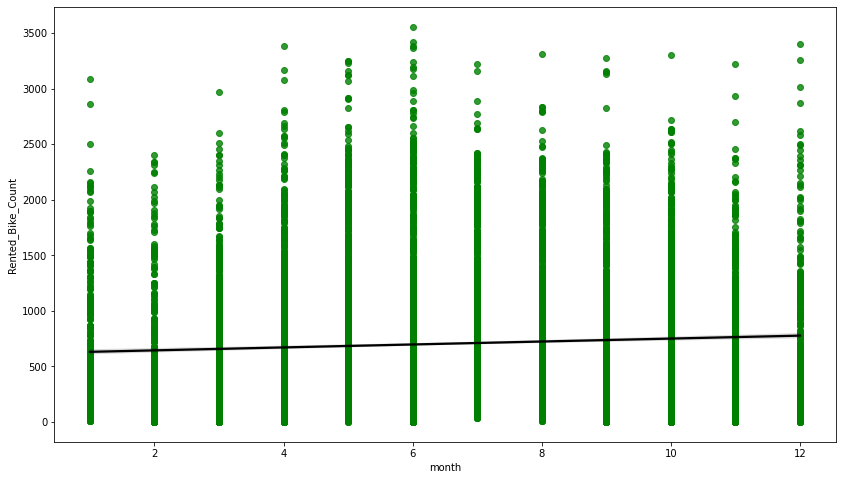

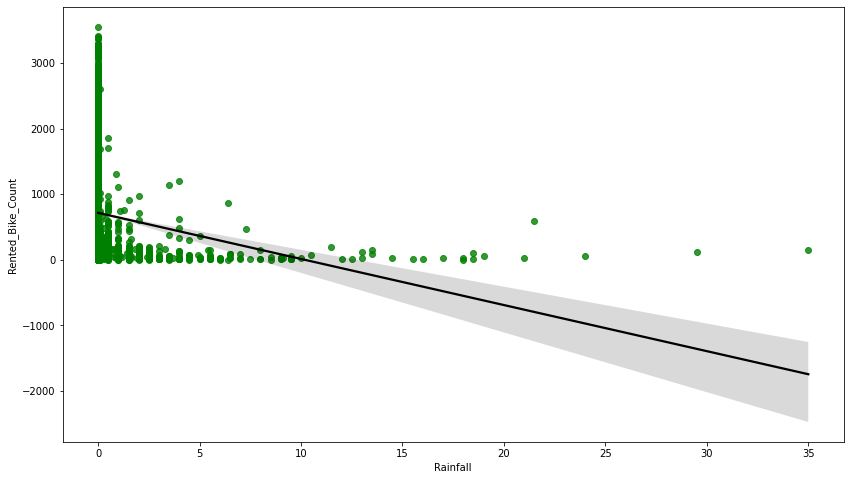

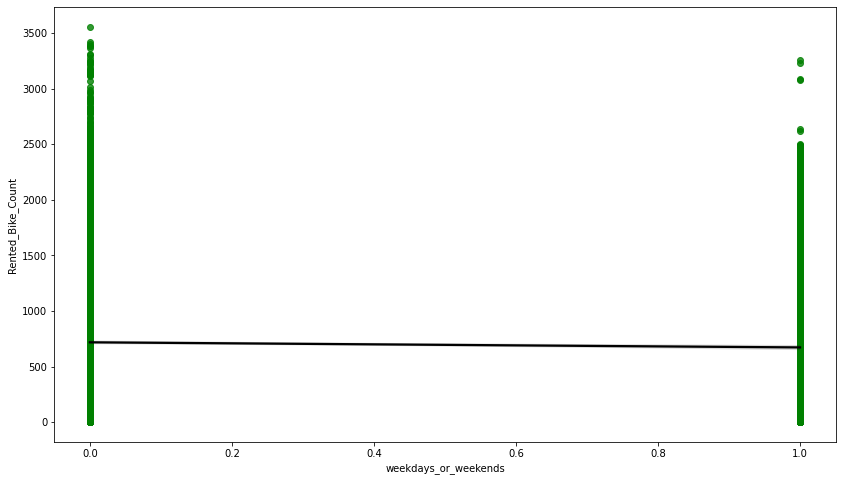

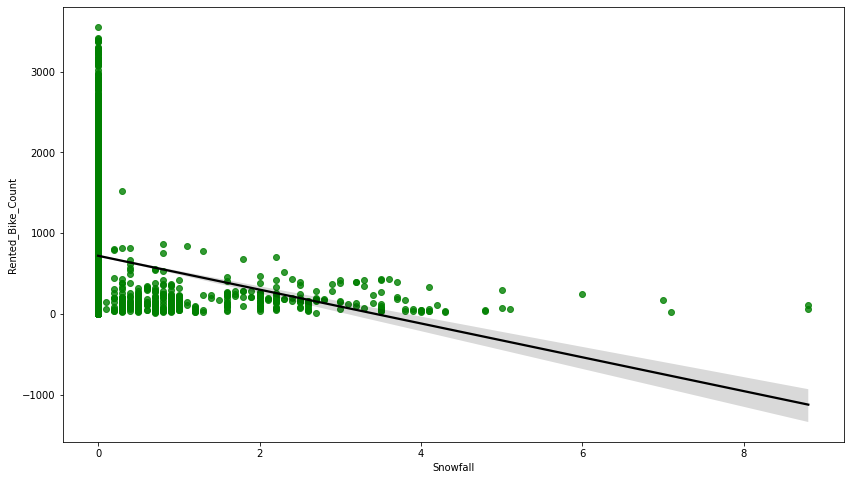

In [396]:
for col in num_col:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={'color':'green'},line_kws={'color':'black'})

#observation:
#Hour:

There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.

Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.

We can say that,from morning 7 AM to Evening 7 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

#Temperature:

For decrease in temperature below 0 deg celicus the bike rent count is significantly decreased because may be people dont want to ride bike in such cold temperature.

But for normal temperature the Bike rent count is very high.

#humidity:

Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

#Wind Speed:

upto wind speed 4 m/s there is good bike rent count.

#Visibility:

It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

#Dew Point Temperature:

It's again the same case as of temperature. As dew temperature goes below 0 deg celcius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong colinarity.

#Solar radiation:

Here the amount of rented bikes is huge, when there is solar radiation.

#Rainfall And snowfall:

Its very obivious that people usually do not like ride bikes in rain and snowfall.

#Let's checking correlation between target(dependent) variable and independent variable#

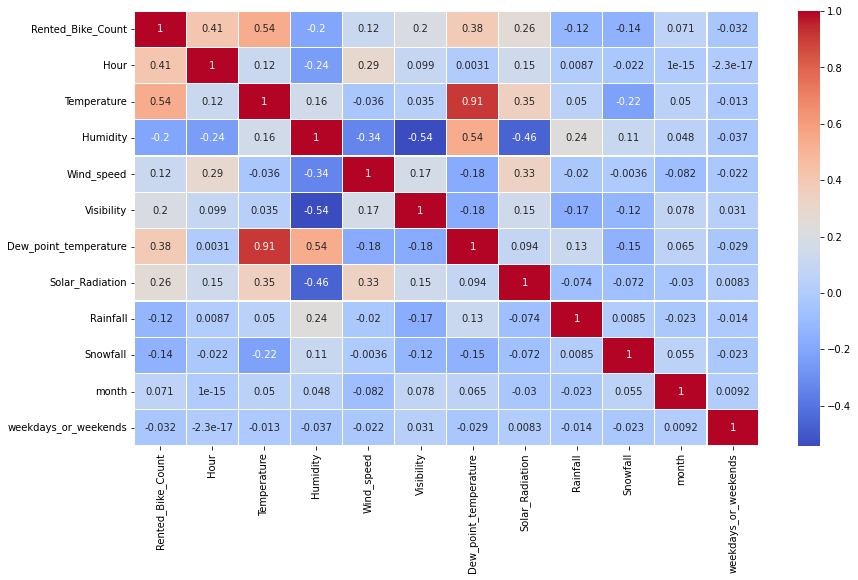

In [397]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linecolor='white',linewidths=0.1)

#observation:
Temperature and Dew point Temperature are highly correlated.

As per our regression assumption, there should not be colinearity between independent variables.

We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.

In [398]:
df.drop('Dew_point_temperature',inplace=True,axis=1)

In [399]:
#Checking the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [400]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])


variables       VIF
0                  Hour  3.961874
1           Temperature  3.236809
2              Humidity  6.114153
3            Wind_speed  4.616621
4            Visibility  5.404128
5       Solar_Radiation  2.272068
6              Rainfall  1.081252
7              Snowfall  1.125304
8                 month  4.580307
9  weekdays_or_weekends  1.399708

Humidity VIF is greater than 5 so we will remove that column

In [401]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

variables       VIF
0                  Hour  3.931193
1           Temperature  2.543847
2            Wind_speed  4.301342
3            Visibility  5.330632
4       Solar_Radiation  1.894468
5              Rainfall  1.045135
6              Snowfall  1.081123
7                 month  3.741610
8  weekdays_or_weekends  1.375146

Visibility VIF is greater than 5 so we will remove that column.

In [402]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

variables       VIF
0                  Hour  3.755736
1           Temperature  2.492225
2            Wind_speed  3.748534
3       Solar_Radiation  1.893823
4              Rainfall  1.030569
5              Snowfall  1.077566
6                 month  3.049391
7  weekdays_or_weekends  1.350943

In [403]:
# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [404]:
#dropping the Day columns
df.drop('day',inplace=True,axis=1)

In [405]:
# checking categoiries in season column.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [406]:
# Createing dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In regression analysis, a dummy variable (also known as indicator variable or just dummy) is one that takes the values 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.

In [407]:
# checking categoiries in holiday columns.
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [408]:
#creating the copy of dataset
temp=df.copy()

In [409]:
# Labeling for holiday=1 and no holiday=0
temp['Holiday']=temp['Holiday'].rename({'No Holiday':0, 'Holiday':1})

In [410]:
temp.head()

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0         -5.2         2.2              0.0   
1                204     1         -5.5         0.8              0.0   
2                173     2         -6.0         1.0              0.0   
3                107     3         -6.2         0.9              0.0   
4                 78     4         -6.0         2.3              0.0   

   Rainfall  Snowfall     Holiday Functioning_Day  month  \
0       0.0       0.0  No Holiday             Yes      1   
1       0.0       0.0  No Holiday             Yes      1   
2       0.0       0.0  No Holiday             Yes      1   
3       0.0       0.0  No Holiday             Yes      1   
4       0.0       0.0  No Holiday             Yes      1   

   weekdays_or_weekends  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0                     0               0               0               1  
1                     0               0               0               1  
2                     0               0               0               1  
3                     0               0               0               1  
4                     0               0               0               1

In [411]:
temp['Holiday'].replace({'No Holiday':0,'Holiday':1},inplace=True)

In [412]:
temp['Functioning_Day'].replace({'Yes':1, 'No':0},inplace=True)

In [413]:
temp.drop('day',inplace=True,axis=1)


KeyError: ignored

In [414]:
temp.head()

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0         -5.2         2.2              0.0   
1                204     1         -5.5         0.8              0.0   
2                173     2         -6.0         1.0              0.0   
3                107     3         -6.2         0.9              0.0   
4                 78     4         -6.0         2.3              0.0   

   Rainfall  Snowfall  Holiday  Functioning_Day  month  weekdays_or_weekends  \
0       0.0       0.0        0                1      1                     0   
1       0.0       0.0        0                1      1                     0   
2       0.0       0.0        0                1      1                     0   
3       0.0       0.0        0                1      1                     0   
4       0.0       0.0        0                1      1                     0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  
0               0               0               1  
1               0               0               1  
2               0               0               1  
3               0               0               1  
4               0               0               1

# Now we will train our models

#Linear Regression

In [415]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [416]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=temp.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(temp['Rented_Bike_Count'])

In [417]:
# Split data into train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [419]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
     

In [418]:

# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 13)
(6132,)
(2628, 13)
(2628,)


In [420]:
# Taking instance
reg=LinearRegression()
# fitting the model and trainig
reg.fit(X_train,y_train)

LinearRegression()

In [421]:
# Check coefficents
reg.coef_

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [422]:
# Check intercept
reg.intercept_

-21.47705344024816

In [423]:
#checking score
reg.score(X_train,y_train)

0.6123528085603556

In [424]:
# Y peredictions on train data
y_pred_train=reg.predict(X_train)

# y predictions on test data
y_pred=reg.predict(X_test)

In [425]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8555397241788345.
The Mean Squred Error(MSE) is 60.29949292444555.
The Root Mean Squared Error(RMSE) is 7.765274813195316.
The R2 Score is 0.6123528085603556.


In [426]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [427]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8555  60.2995  7.7653    0.6124

In [428]:

# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.834169822951748.
 The Mean Squred Error(MSE) is 58.624247223024895.
The Root Mean Squared Error(RMSE) is 7.656647257319936.
The R2 Score is 0.618326967365199.


In [429]:
# saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [431]:
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8342  58.6242  7.6566    0.6183

In [430]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred,y_test):
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [432]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [433]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 
def Residual_distPlot(y_pred,y_test):  
  '''Checks the distribution of residals)'''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")
     
    

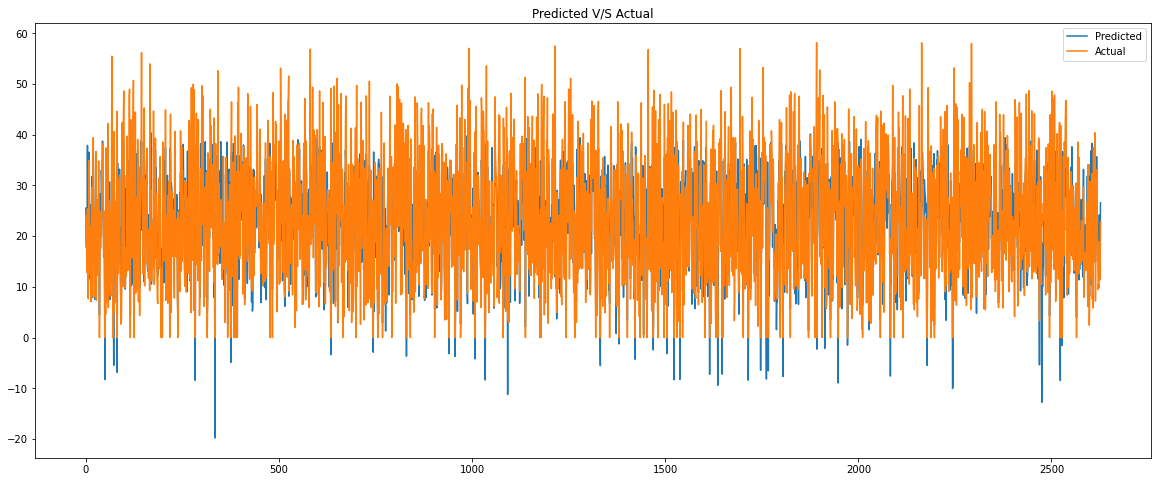

In [434]:
plot_Pred_vs_actual(y_pred,y_test)
     

Text(0.5, 0, 'y_predicted')

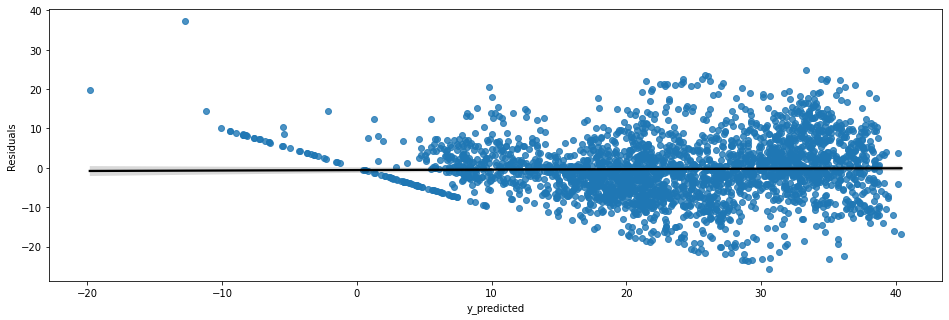

In [435]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

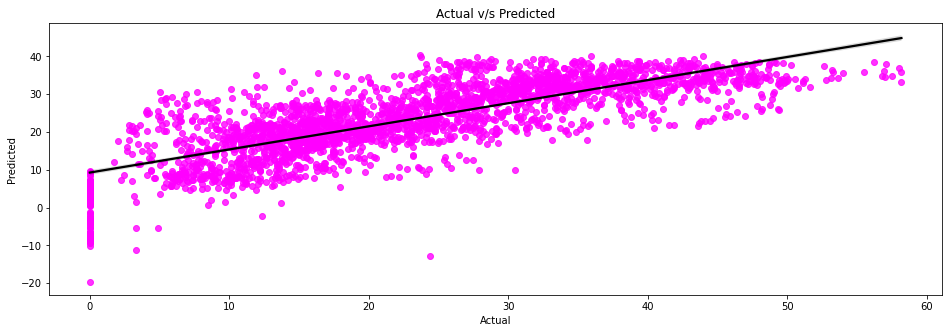

In [436]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


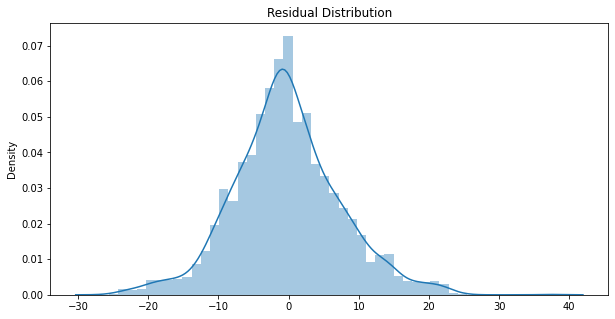

In [437]:
Residual_distPlot(y_pred,y_test)

#Lasso

In [438]:
# instantiating
lasso_reg=Lasso(alpha=0.01)

In [439]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [440]:
# Check coefficient
lasso_reg.coef_

array([ 13.06618706,  23.53689635,   2.7511264 ,   3.64259929,
       -61.65707559,  -6.14969513,  -2.72395881,  27.99198566,
         0.97614536,  -0.51631491,  -2.73325777,  -3.18707888,
        -6.55141403])

In [442]:
# Check intercept
lasso_reg.intercept_

-20.65131177706763

In [443]:
#chcecking score on training data
lasso_reg.score(X_train,y_train)

0.6112950857219155

In [444]:
# Y peredictions on train data
y_pred_train=lasso_reg.predict(X_train)

# y predictions on test data
y_pred=lasso_reg.predict(X_test)

In [445]:
# Check score on test dataset
lasso_reg.score(X_test,y_test)

0.61723035952942

In [446]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [447]:
# Create train results dictionary
train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [448]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8555  60.2995  7.7653    0.6124
1              Lasoo  5.8691  60.4640  7.7759    0.6113

#Evaluation On Test Data

In [449]:

# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [450]:
# Create test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [451]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8342  58.6242  7.6566    0.6183
1              Lasso  5.8506  58.7927  7.6676    0.6172

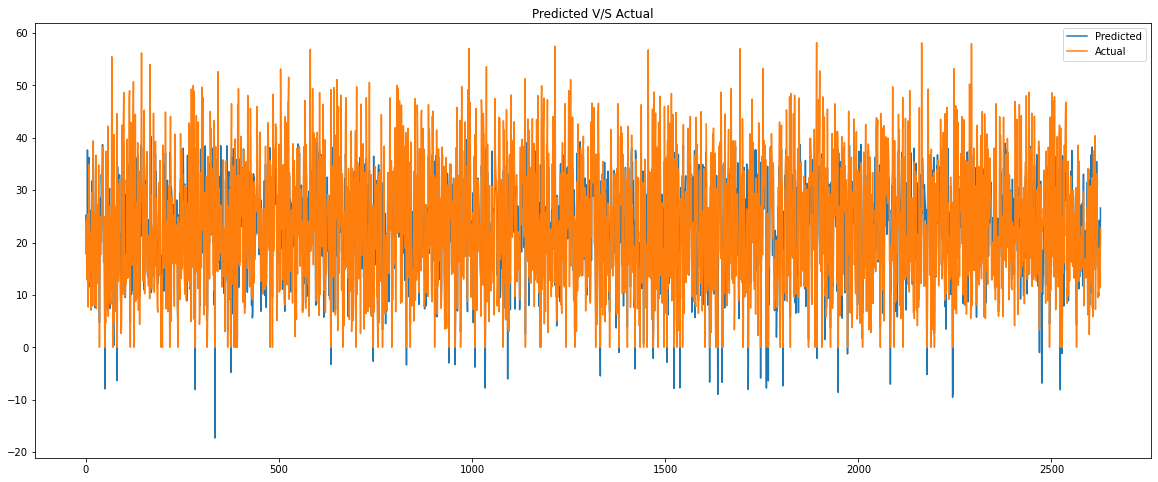

In [452]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

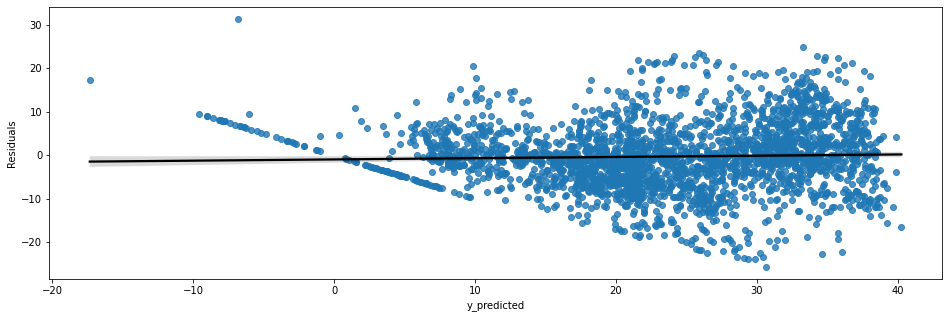

In [453]:

# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

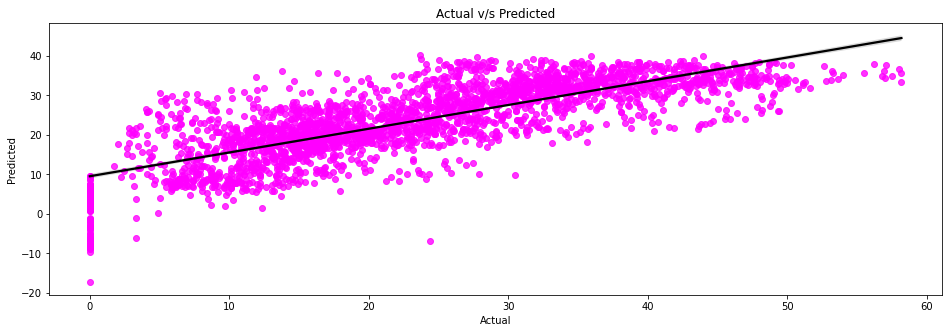

In [454]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


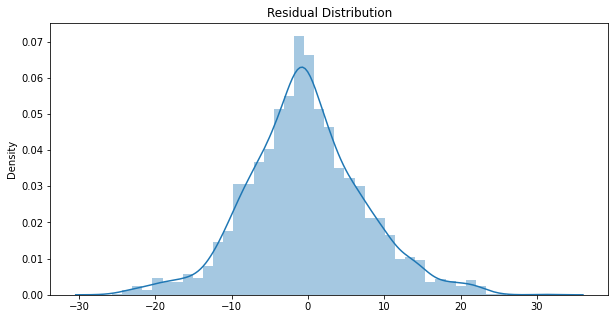

In [455]:

# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

#Ridge

In [456]:
# instantiating
ridge_lg=Ridge(alpha=0.1)
# fitting and training
ridge_lg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [457]:
# check coefficient
ridge_lg.coef_

array([ 13.03371786,  24.34582856,   3.34949793,   3.4576116 ,
       -70.04499364, -10.41205151,  -3.00303898,  28.46135581,
         1.05691503,  -0.58736967,  -2.9327985 ,  -3.57190574,
        -6.46665547])

In [458]:
# check intercept
ridge_lg.intercept_

-21.44118629409719

#Evaluation On Train Dat

In [459]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [460]:
train_dict={'Model':"Ridge GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [461]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0   Linear Regression  5.8555  60.2995  7.7653    0.6124
1               Lasoo  5.8691  60.4640  7.7759    0.6113
2  Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113

#Evaluation On Test Data.

In [462]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")
     

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [463]:
test_dict={'Model':"Ridge(GridsearchCv Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [464]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0           Linear Regression  5.8342  58.6242  7.6566    0.6183
1                       Lasso  5.8506  58.7927  7.6676    0.6172
2  Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172

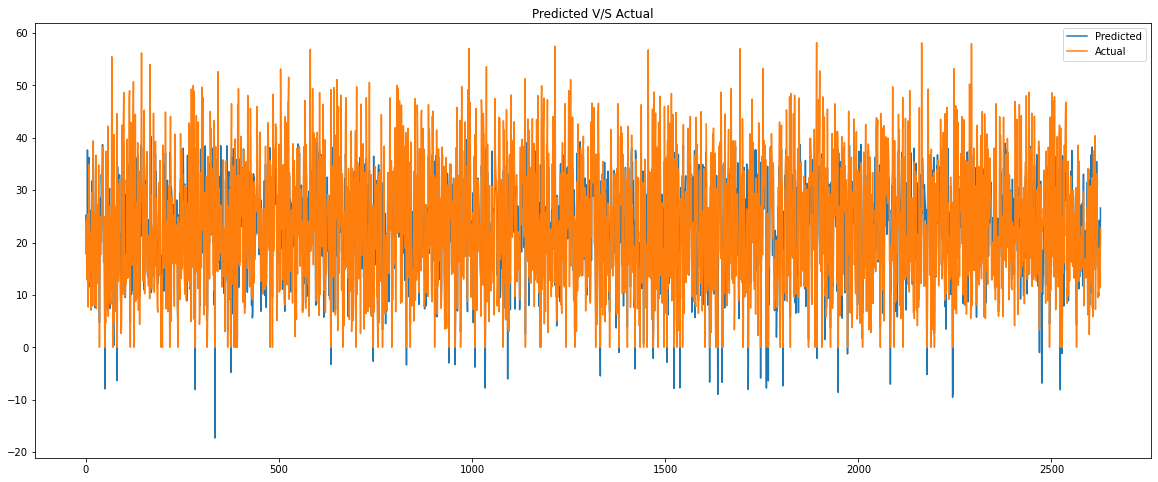

In [465]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

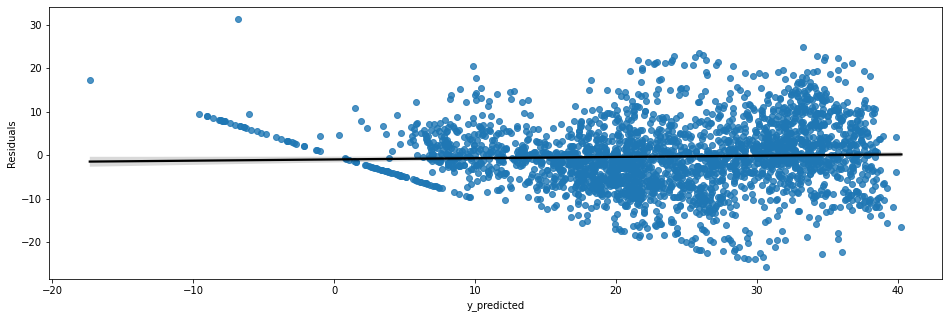

In [466]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')
     

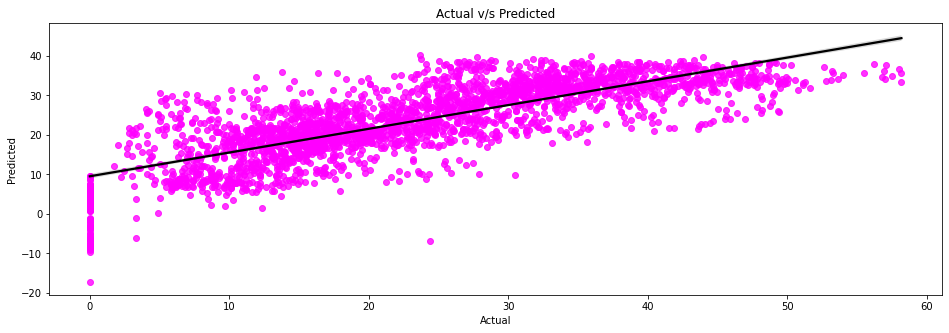

In [467]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


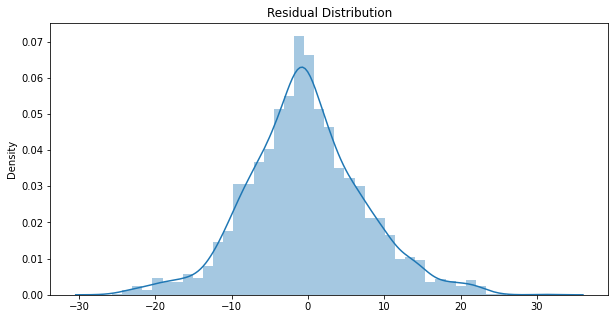

In [468]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)
     

#GreadSearchCV on Ridge

In [469]:
# importing gridsearchcv for hyper parameter tuning
from sklearn.model_selection  import GridSearchCV

In [470]:
# cross validation on Ridge regression
# creating object
ridge_reg=Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [471]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -60.73715246759981


#ElasticNet

In [472]:
# creating object of elastic net
elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [474]:
# Check score on train data
elastic_net_reg.score(X_train,y_train)

0.6084747377362095

In [475]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.6139867979293316

In [477]:
#checking coefficients
elastic_net_reg.coef_

array([ 13.03303328,  22.99577636,   3.11565577,   3.96121546,
       -47.76303709,  -8.62168306,  -2.92302047,  27.90188985,
         1.07646762,  -0.54626146,  -2.90865095,  -3.25071992,
        -6.69317048])

In [478]:
#checking intercept
elastic_net_reg.intercept_

-20.368465770400665

In [479]:
# predicting Y train values from train data set
y_pred_train=elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred=elastic_net_reg.predict(X_test)
     

In [480]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8932275545714745.
The Mean Squred Error(MSE) is 60.90273656811195.
The Root Mean Squared Error(RMSE) is 7.804020538678249.
The R2 Score is 0.6084747377362095.


In [481]:
train_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

In [482]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.871068266349744.
 The Mean Squred Error(MSE) is 59.2908889405223.
The Root Mean Squared Error(RMSE) is 7.700057723194178.
The R2 Score is 0.6139867979293316.


In [483]:
test_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [484]:

test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8342  58.6242  7.6566    0.6183
1                            Lasso  5.8506  58.7927  7.6676    0.6172
2       Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3  ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140

In [485]:

# Cross validation

elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.624e+02, tolerance: 7.283e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.962e+04, tolerance: 7.060e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.044e+04, tolerance: 7.151e+01

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
# print best parameters and best score
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

L1_ratio

Its range is 0 < = l1_ratio < = 1. If l1_ratio = 1, the penalty would be L1 penalty. If l1_ratio = 0, the penalty would be an L2 penalty. *If the value of l1 ratio is between 0 and 1, the penalty would be the combination of L1 and L2.

In [ ]:

# plotting predicted v/s actual
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

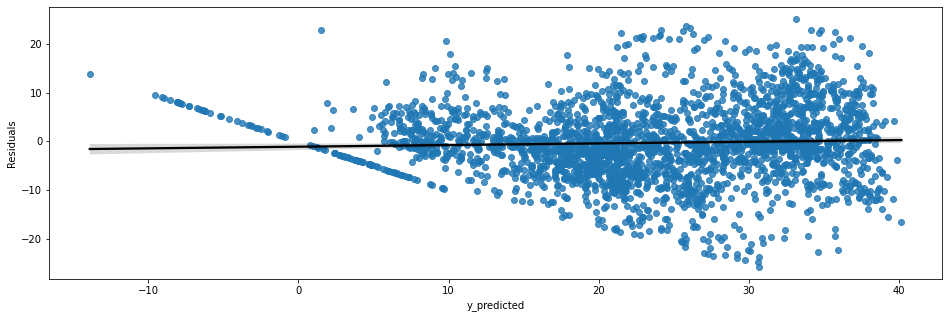

In [486]:

# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

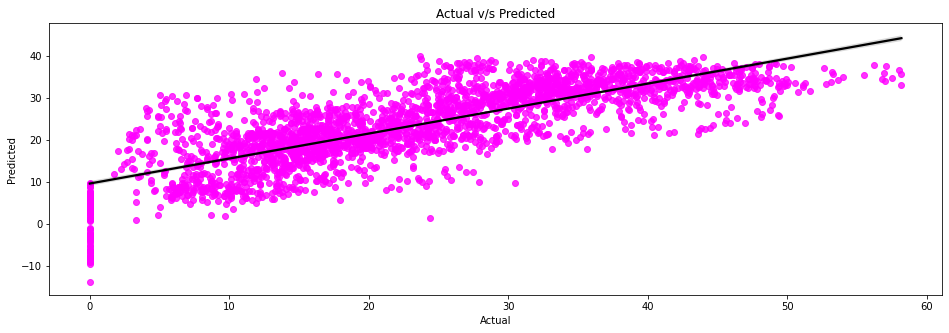

In [487]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


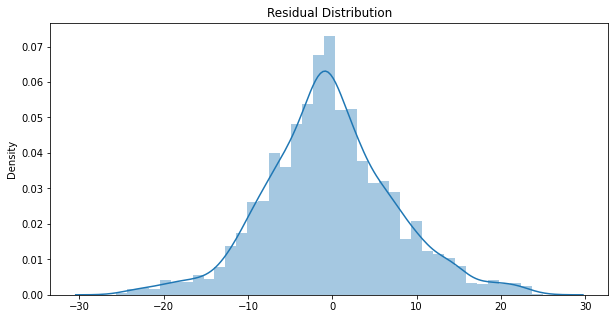

In [488]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)
     

As We have saw in linear regression,lasso,ridge and elastic net we are getting almost similar r2 scores

#Decision Tree Regressor

In [489]:

#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [490]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

0.8814250872495163

In [491]:
# Check score on Test dataset
D_tree.score(X_test,y_test)

0.8379335976736034

In [492]:
#  predicting y_train_predictions from  X train values
y_pred_train=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred=D_tree.predict(X_test)

In [493]:

# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.8855165215690715.
The Mean Squred Error(MSE) is 18.44462508772692.
The Root Mean Squared Error(RMSE) is 4.294720606480347.
The R2 Score is 0.8814250872495163.


In [494]:
# creating dictionary  of Decison tree results( Train dataset)
train_dict={'Model':"Decision Tree Regressor-GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [495]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814

In [496]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")
     


 The Mean Absolute Error (MAE) is 3.400204478833313.
 The Mean Squred Error(MSE) is 24.893089173580204.
The Root Mean Squared Error(RMSE) is 4.989297462928043.
The R2 Score is 0.8379335976736034.


In [497]:
test_dict={'Model':"Decision Tree Regressor(GridsearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [498]:

test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4002  24.8931  4.9893    0.8379

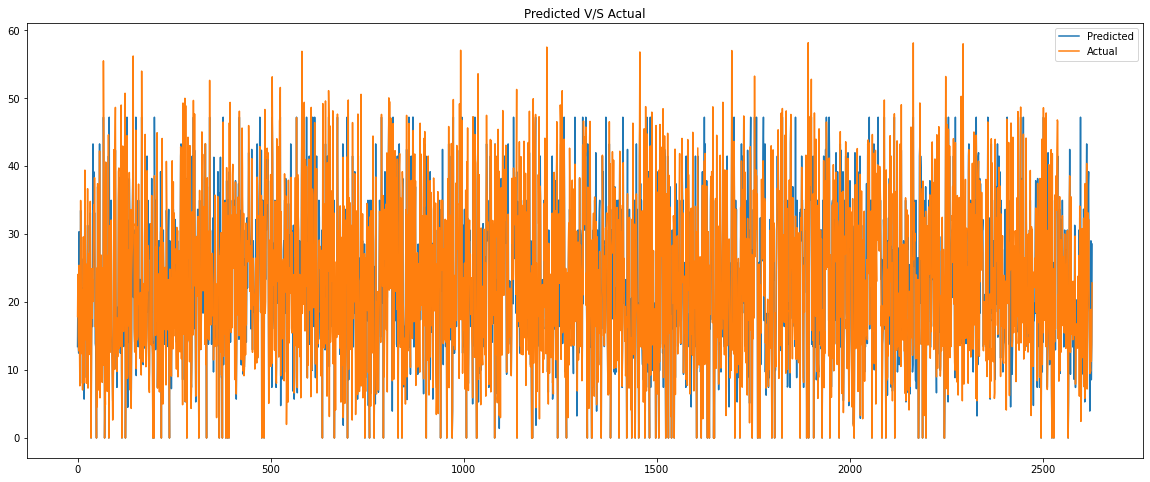

In [499]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

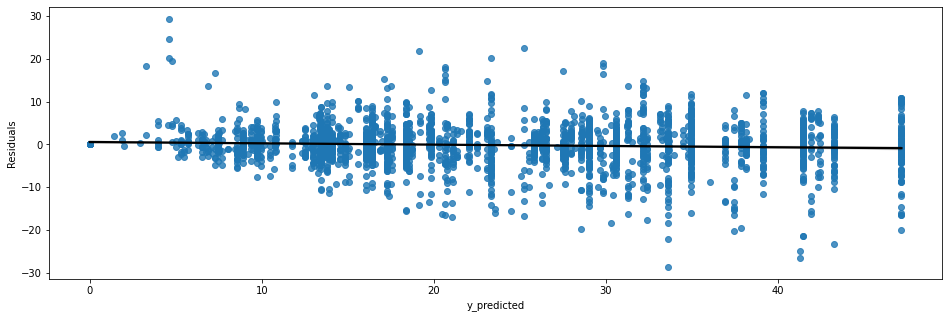

In [500]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

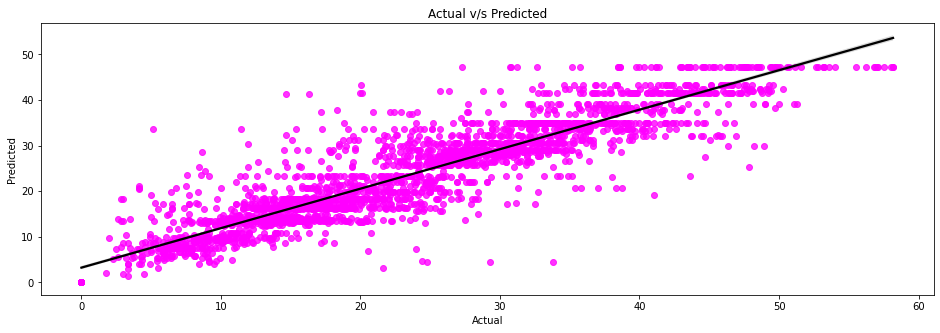

In [501]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)
     

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


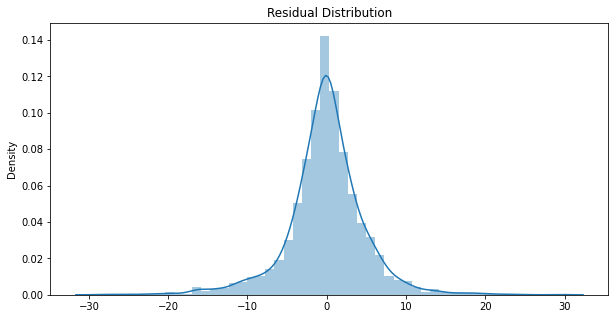

In [502]:

# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

#Hyperparameter Tuning

In [503]:
# Hyper parameters range intialization for tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }

In [504]:
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarni

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae'], 'max_depth': [3, 5, 7, 9, None],
                         'max_features': ['auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [505]:
tuning_model.best_params_
     

{'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [506]:
D_tree=DecisionTreeRegressor(max_depth=9,max_features='auto',splitter='best')
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

Text(0.5, 0, 'Relative Importance')

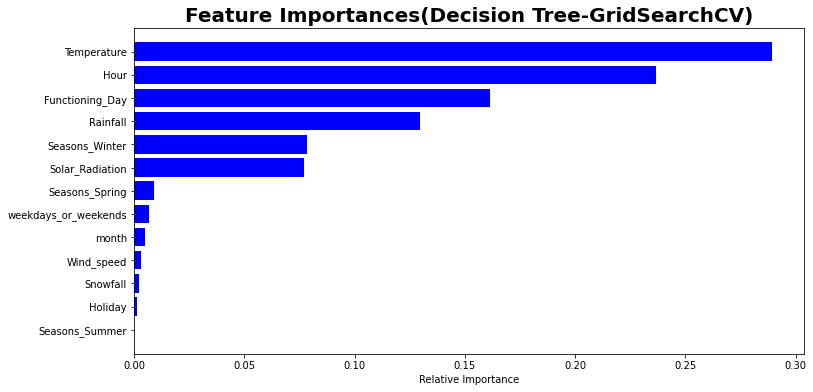

In [507]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)',fontweight="bold",fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

#Random Forest Regressor

In [508]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
     

RandomForestRegressor()

In [511]:
#score on train data
rf.score(X_train,y_train)

0.9865148264769952

In [512]:
#score on test data
rf.score(X_test,y_test)

0.9071648603843345

In [510]:

y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [509]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.8855165215690715.
The Mean Squred Error(MSE) is 18.44462508772692.
The Root Mean Squared Error(RMSE) is 4.294720606480347.
The R2 Score is 0.8814250872495163.


In [513]:

train_dict={'Model':"Random Forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
4                         Random Forest  2.8855  18.4446  4.2947    0.8814

In [515]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.4954592385996115.
 The Mean Squred Error(MSE) is 14.25929974209178.
The Root Mean Squared Error(RMSE) is 3.776148797663008.
The R2 Score is 0.9071648603843345.


In [514]:

test_dict={'Model':"Radom forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df
     

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4002  24.8931  4.9893    0.8379
5                           Radom forest  2.8855  18.4446  4.2947    0.8814

#GridSearchCV On random Forest

In [516]:
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [517]:
rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [518]:
rf_tuning.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [519]:
rf=RandomForestRegressor(max_depth=9,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=9)

In [520]:
rf.score(X_train,y_train)

0.9043312900558251

In [521]:
rf.score(X_test,y_test)

0.8778996540845336

In [522]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [523]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.618773219783587.
The Mean Squred Error(MSE) is 14.881507787907676.
The Root Mean Squared Error(RMSE) is 3.85765573734978.
The R2 Score is 0.9043312900558251.


In [524]:

train_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
4                         Random Forest  2.8855  18.4446  4.2947    0.8814
5            Random Forest-GridSearchCv  2.6188  14.8815  3.8577    0.9043

In [525]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.9448825995222165.
 The Mean Squred Error(MSE) is 18.754379410961.
The Root Mean Squared Error(RMSE) is 4.330632680216714.
The R2 Score is 0.8778996540845336.


In [526]:

test_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4002  24.8931  4.9893    0.8379
5                           Radom forest  2.8855  18.4446  4.2947    0.8814
6             Random Forest-GridSearchCv  2.9449  18.7544  4.3306    0.8779

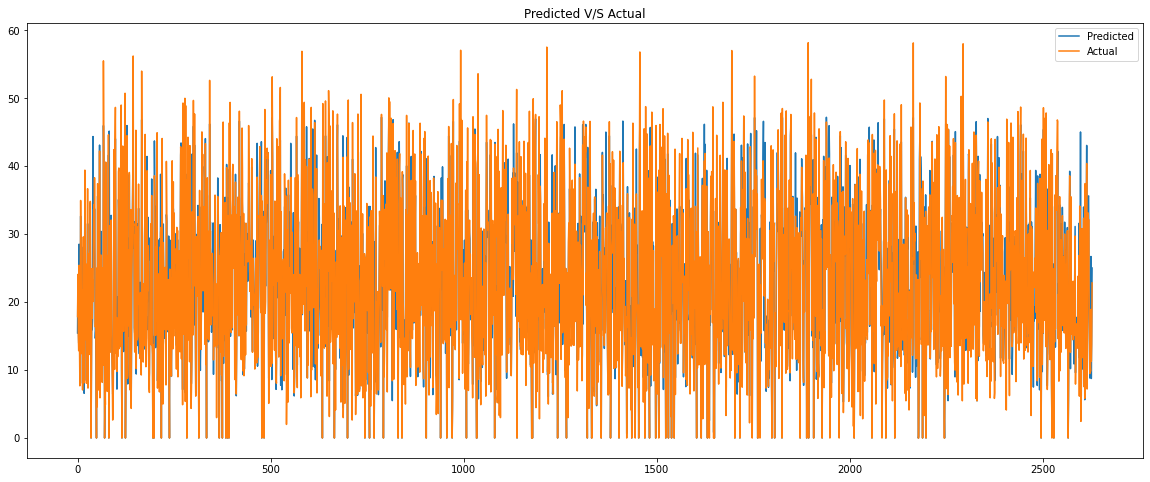

In [527]:
plot_Pred_vs_actual(y_pred,y_test)

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

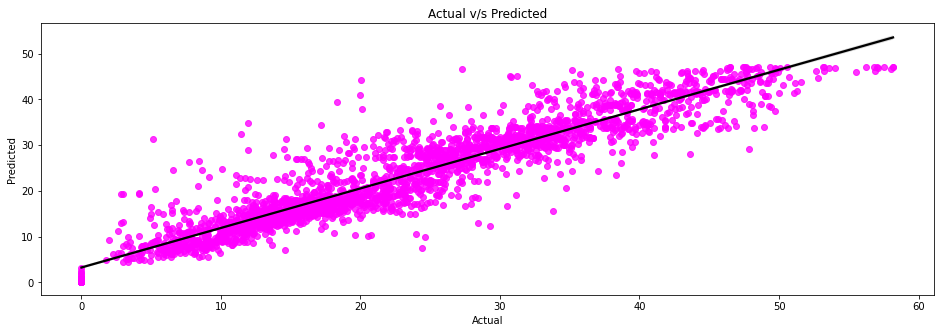

In [528]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


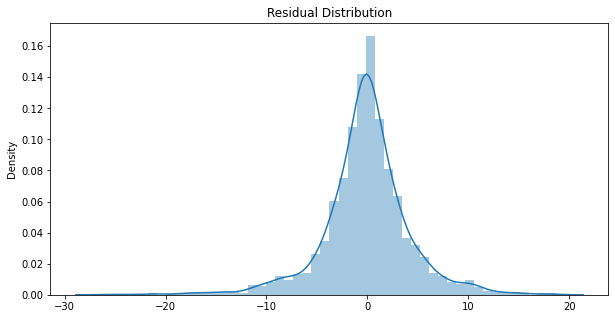

In [529]:

# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

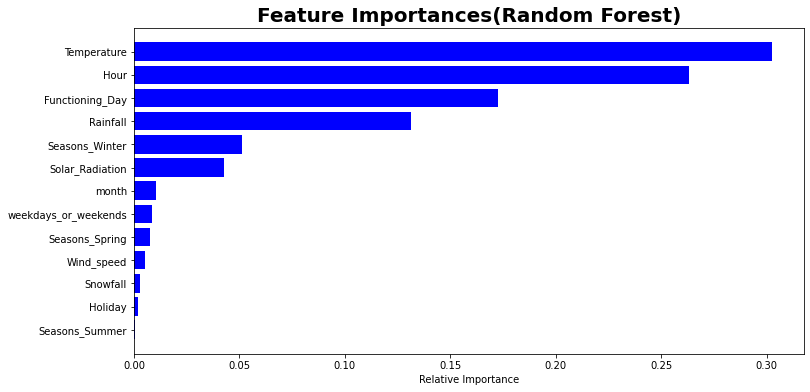

In [530]:

imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)',fontweight="bold",fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

By looking at the graph we can say that temperature and hours plays very important role on bike rentals.

#Gradient Boosting Regressor

In [531]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [532]:
gradboo_reg.score(X_train,y_train)

0.86803340650971

In [533]:
gradboo_reg.score(X_test,y_test)

0.858845972488303

In [534]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred=gradboo_reg.predict(X_test)

In [535]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 3.1772012244215926.
The Mean Squred Error(MSE) is 20.527734615794035.
The Root Mean Squared Error(RMSE) is 4.530754309802512.
The R2 Score is 0.86803340650971.


In [536]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")
     

 The Mean Absolute Error (MAE) is 3.2841399058230527.
 The Mean Squred Error(MSE) is 21.680988432025956.
The Root Mean Squared Error(RMSE) is 4.656284831496668.
The R2 Score is 0.858845972488303.


In [537]:
test_dict={'Model':"Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4002  24.8931  4.9893    0.8379
5                           Radom forest  2.8855  18.4446  4.2947    0.8814
6             Random Forest-GridSearchCv  2.9449  18.7544  4.3306    0.8779
7           Gradient Boosting Regression  3.2841  21.6810  4.6563    0.8588

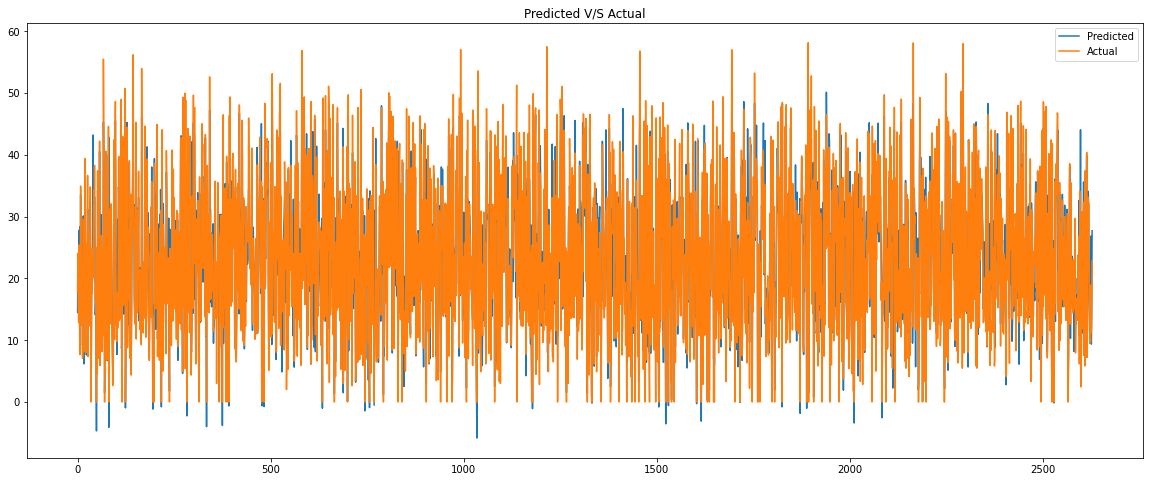

In [538]:

plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

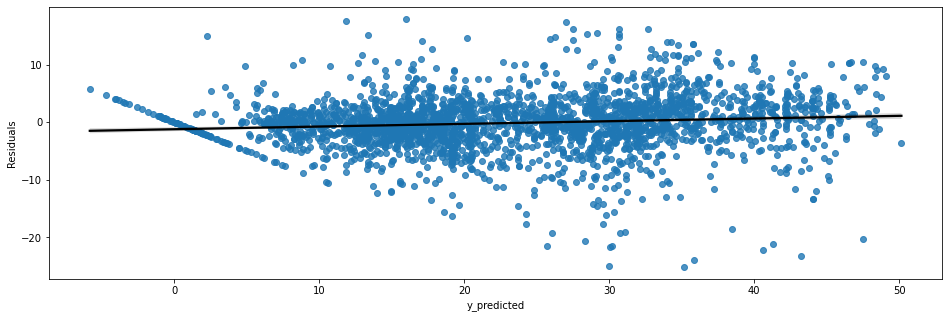

In [539]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

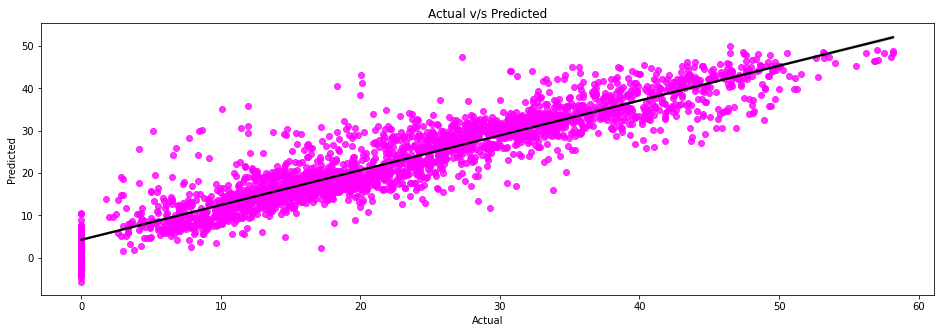

In [540]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


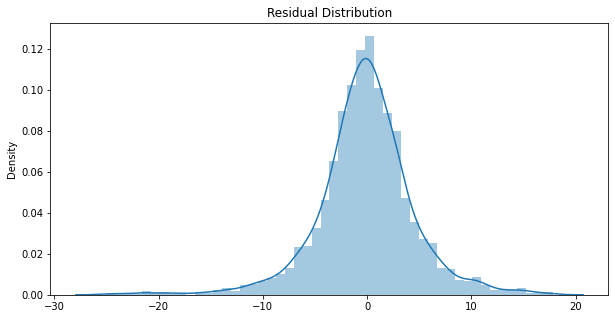

In [541]:

# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

#GridSearchCV on Gradient Boosting Regressor

In [542]:
gbr=GradientBoostingRegressor()

In [543]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }

In [544]:
#Gridsearch
grad_boo_tuning=GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [545]:
# get best paramters to use
grad_boo_tuning.best_params_
     

{'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9}

In [546]:
# USing best paramters tunned by GridsearchCv 
gradboo_tuned=GradientBoostingRegressor(learning_rate=0.04,max_depth=8,n_estimators=150,subsample=0.9)
gradboo_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=150,
                          subsample=0.9)

In [547]:
# checking score on train data
gradboo_tuned.score(X_train,y_train)

0.9679875783796207

In [548]:

#checking score on test data
gradboo_tuned.score(X_test,y_test)
     

0.9124829782312057

In [549]:
# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train=gradboo_tuned.predict(X_train)
# y predictions on test data
y_pred=gradboo_tuned.predict(X_test)

In [550]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 1.5347548400644677.
The Mean Squred Error(MSE) is 4.979612476550021.
The Root Mean Squared Error(RMSE) is 2.2315045320478335.
The R2 Score is 0.9679875783796207.


In [ ]:
train_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

In [551]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.3921852189258885.
 The Mean Squred Error(MSE) is 13.44244702063039.
The Root Mean Squared Error(RMSE) is 3.666394280574634.
The R2 Score is 0.9124829782312057.


In [552]:
test_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  \
0                           Linear Regression  5.8342  58.6242  7.6566   
1                                       Lasso  5.8506  58.7927  7.6676   
2                  Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676   
3             ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001   
4       Decision Tree Regressor(GridsearchCV)  3.4002  24.8931  4.9893   
5                                Radom forest  2.8855  18.4446  4.2947   
6                  Random Forest-GridSearchCv  2.9449  18.7544  4.3306   
7                Gradient Boosting Regression  3.2841  21.6810  4.6563   
8  Gradient Boosting Regression(GridSearchCV)  2.3922  13.4424  3.6664   

   R2_score  
0    0.6183  
1    0.6172  
2    0.6172  
3    0.6140  
4    0.8379  
5    0.8814  
6    0.8779  
7    0.8588  
8    0.9125

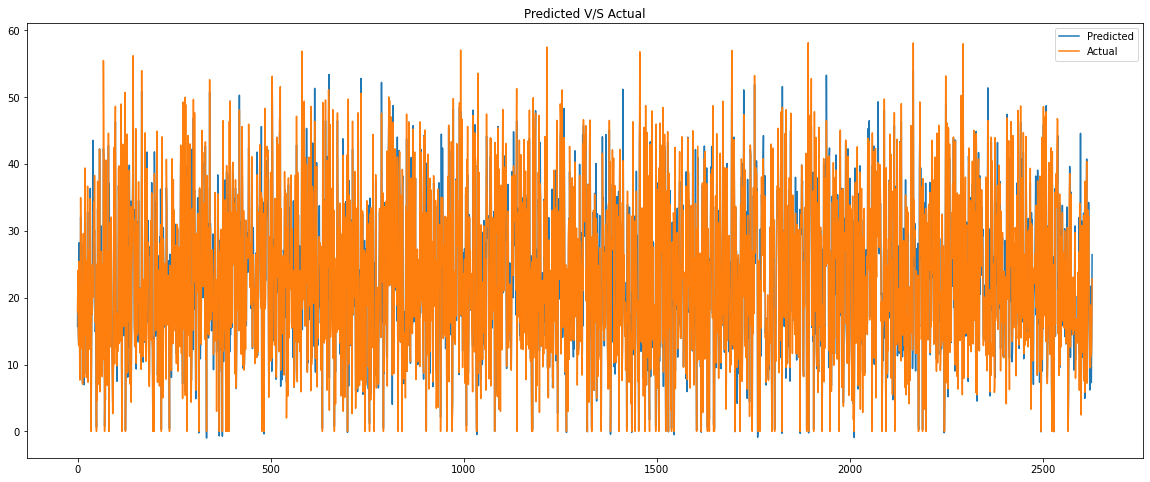

In [553]:

plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

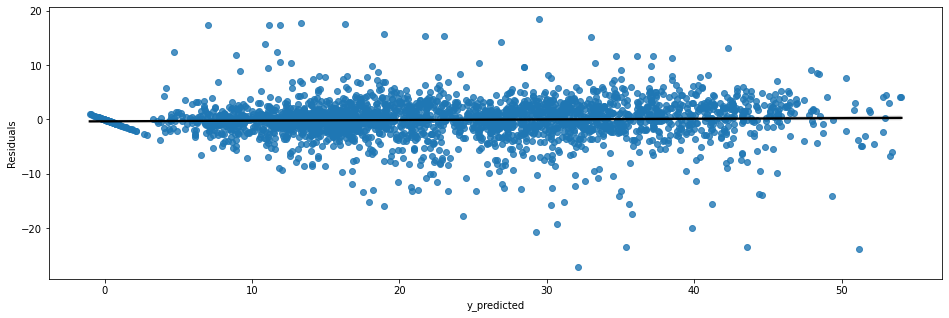

In [554]:

# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

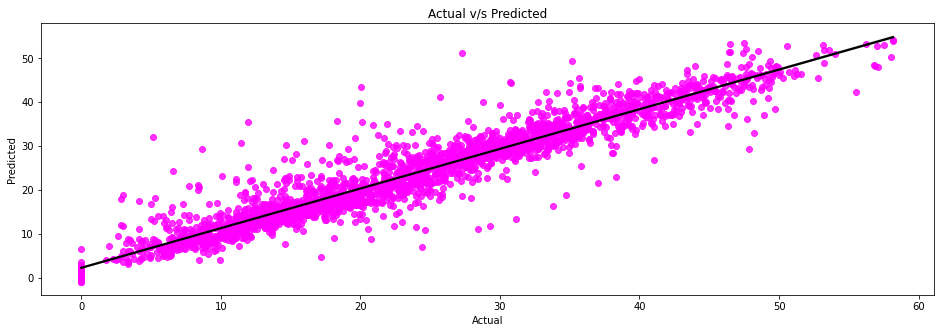

In [555]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


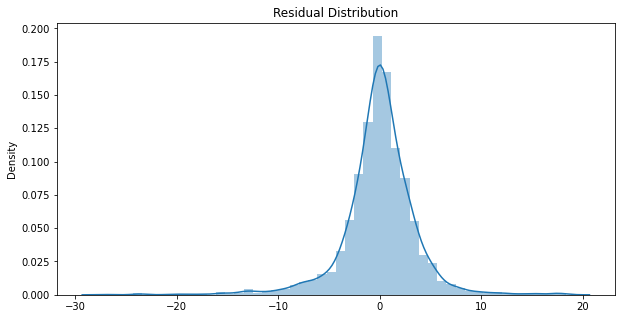

In [556]:

# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

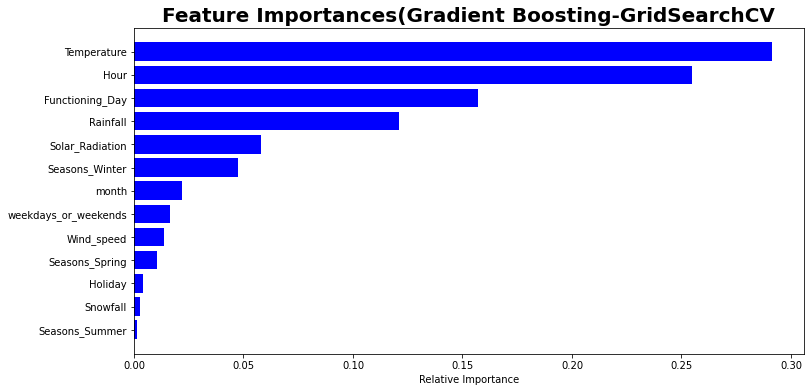

In [558]:
## Checking Feature imporatance
imp_variables=X.columns
importances = gradboo_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV',fontweight="bold",fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

In [559]:

# Check Final table of All models
final_result=pd.concat([traing_results_df,test_results_df],keys=['Training set','Test set'])
final_result

Model     MAE      MSE  \
Training set 0                           Linear Regression  5.8555  60.2995   
             1                                       Lasoo  5.8691  60.4640   
             2                          Ridge GridSearchCV  5.8691  60.4640   
             3        Decision Tree Regressor-GridSearchCV  2.8855  18.4446   
             4                               Random Forest  2.8855  18.4446   
             5                  Random Forest-GridSearchCv  2.6188  14.8815   
Test set     0                           Linear Regression  5.8342  58.6242   
             1                                       Lasso  5.8506  58.7927   
             2                  Ridge(GridsearchCv Tunned)  5.8506  58.7927   
             3             ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909   
             4       Decision Tree Regressor(GridsearchCV)  3.4002  24.8931   
             5                                Radom forest  2.8855  18.4446   
             6                  Random Forest-GridSearchCv  2.9449  18.7544   
             7                Gradient Boosting Regression  3.2841  21.6810   
             8  Gradient Boosting Regression(GridSearchCV)  2.3922  13.4424   

                  RMSE  R2_score  
Training set 0  7.7653    0.6124  
             1  7.7759    0.6113  
             2  7.7759    0.6113  
             3  4.2947    0.8814  
             4  4.2947    0.8814  
             5  3.8577    0.9043  
Test set     0  7.6566    0.6183  
             1  7.6676    0.6172  
             2  7.6676    0.6172  
             3  7.7001    0.6140  
             4  4.9893    0.8379  
             5  4.2947    0.8814  
             6  4.3306    0.8779  
             7  4.6563    0.8588  
             8  3.6664    0.9125

#CONCLUSIONS
From our calculation of MAE,MSE,RMSE and R^2 of each model. We decided the performences.

#Linear, Lasso, Ridge and Elastic Regression

All this model have almost similar R^2 (i.e. 61%) for both train and test dataset. Even after using GridsearchCV we have got similar results as of base models.

#Decision Tree Regression

On Decision Tree Regression model we got 100% R^2 without hyper-parameter tuning on both train and test data. So we can see its over fitted. After hyper-parameter tuning we got 88% on training data and 83% on test data of R^2 which is really good for us.

#Random Forest Regression

For Random Forest Regression model we got 98% on training data and 90% on testing data of R^2 without hyper-parametric tuning. So we can see its overfitted. After hyper-parameter tuning we got R^2 score as 90% on training data and 87% on test data which is very good for us.

#Gradient Bbosting Regression (Gradient Boosting Machine)

On Random Forest Regression model, without hyper-parameter tuning we got R^2 score as 86% on training data and 85% on test data. Our model performed well without hyper-parameter tuning. After hyper-parameter tuning we got R^2 score as 96% on train dataset and 91% on test dataset. So we improfeed the model performance by hyper-parameter tuning.

The overall conclusion is, The Gradient Boosting regression (Girdsearchcv) and Random Forest (Gridsearchvc) both model fitted with good R^2